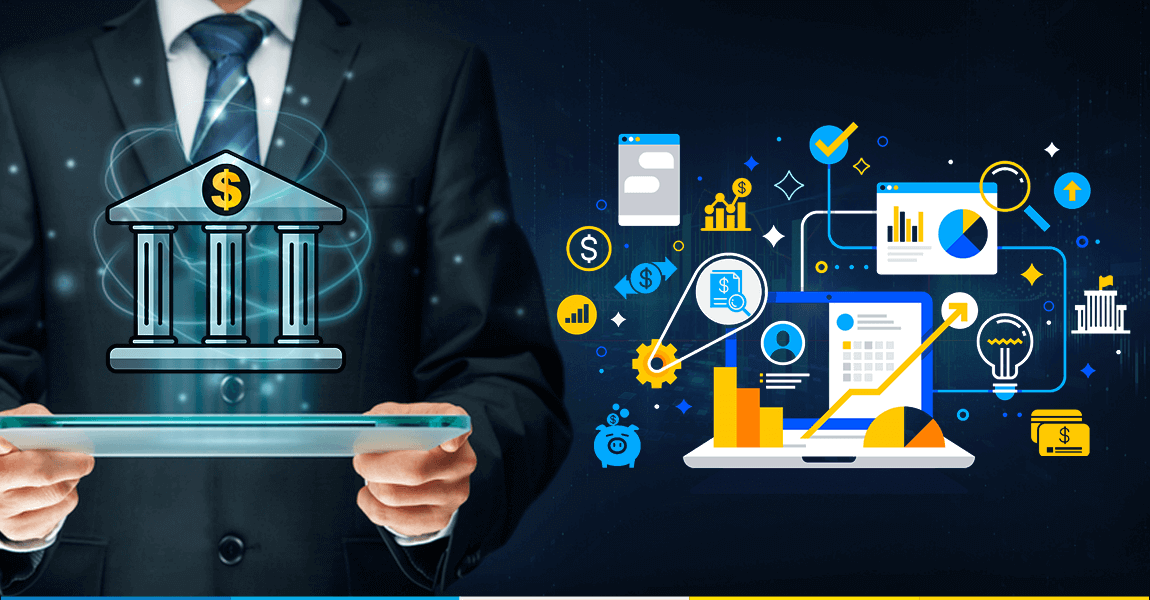

# 📈 Bank Marketing Optimization

## 🧠 Introduction

In today’s competitive banking environment, understanding customer behavior is essential for effective marketing. This project builds an intelligent system using machine learning to improve the performance of term deposit marketing campaigns at a Portuguese bank. 

The system performs two key tasks:

- **Classification**: Predict whether a client will subscribe to a term deposit.
- **Clustering**: Segment clients into groups based on shared characteristics to support targeted marketing.

By applying both supervised and unsupervised learning, this project helps the bank increase campaign success rates, reduce operational costs, and tailor strategies for distinct customer segments.

---

## 🎯 Problem Statement

Banks often struggle to identify which clients are likely to subscribe to financial products like term deposits. Targeting uninterested clients wastes resources and reduces marketing efficiency.

This project addresses that challenge using:
- **Classification models** to predict likely subscribers
- **Clustering algorithms** to segment customers and inform personalized outreach

---

## 📊 Dataset Overview

- **Source**: Portuguese Bank Marketing Dataset
- **Features**:
  - Demographic: Age, job, marital status, education
  - Economic: Consumer confidence, interest rates, etc.
  - Contact & Campaign: Call duration, number of contacts, previous outcomes
- **Target Variable**: Subscription to a term deposit (`yes` or `no`)

---

## ⚙️ Techniques Used

- **Data Preprocessing**: Outlier removal, encoding, scaling, feature engineering
- **Imbalanced Data Handling**: SMOTE for minority class oversampling
- **Dimensionality Reduction**: PCA
- **Classification Models**: Logistic Regression, Random Forest, XGBoost, LightGBM, SVM
- **Clustering Algorithms**: K-Means, Hierarchical Clustering, DBSCAN
- **Evaluation Metrics**:
  - Classification: Accuracy, Precision, Recall, F1-Score, ROC-AUC
  - Clustering: Silhouette Score, Davies-Bouldin Index

---

## 🚀 Key Results

- **Classification**: A Voting Classifier ensemble achieved an F1-score of **92%** and Accuracy of **94.8%**
- **Clustering**: Identified 4 distinct customer groups, enabling targeted marketing strategies
- **Deployment**: A Streamlit web app allows for real-time predictions and insights

---

## 💡 Insights

- Duration of contact and interest rate (Euribor 3m) were strong predictors of subscription
- Retired clients and long-duration calls yielded higher conversion rates
- Custom strategies can now be developed per cluster: young professionals, retirees, passive segments, etc.

---

## 📦 Deployment

A Streamlit app (`app.py`) has been built to interact with the final model and enable real-time marketing predictions based on user input.


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
import numpy as np
import pandas as pd

In [1]:


# Load datasets
bank_additional_full = pd.read_csv("bank-additional-full.csv", sep=';')
bank_additional = pd.read_csv("bank-additional.csv", sep=';')
bank_full = pd.read_csv("bank-full.csv", sep=';')
bank = pd.read_csv("bank.csv", sep=';')


In [2]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Basic Analysis

In [7]:
# Display shapes of the datasets
print("bank_additional_full shape:", bank_additional_full.shape)
print("bank_additional shape:", bank_additional.shape)
print("bank_full shape:", bank_full.shape)
print("bank shape:", bank.shape)

bank_additional_full shape: (41188, 21)
bank_additional shape: (4119, 21)
bank_full shape: (45211, 17)
bank shape: (4521, 17)


In [8]:
# Basic analysis for bank_additional_full
"Columns:", bank_additional_full.columns.tolist()




('Columns:',
 ['age',
  'job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'poutcome',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'y'])

In [9]:
print("Data Types:")
bank_additional_full.dtypes


Data Types:


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
print("\nSummary Statistics:")
bank_additional_full.describe()


Summary Statistics:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
print("\nMissing Values:")
bank_additional_full.isnull().sum()


Missing Values:


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
# Basic analysis for bank_additional
print("\nbank_additional - Basic Analysis")
print("Shape:", bank_additional.shape)
print("Columns:", bank_additional.columns.tolist())
print("Data Types:")
print(bank_additional.dtypes)
print("\nMissing Values:")
print(bank_additional.isnull().sum())
print("\nSummary Statistics:")
print(bank_additional.describe(include='all'))

# Basic analysis for bank_full
print("\nbank_full - Basic Analysis")
print("Shape:", bank_full.shape)
print("Columns:", bank_full.columns.tolist())
print("Data Types:")
print(bank_full.dtypes)
print("\nMissing Values:")
print(bank_full.isnull().sum())
print("\nSummary Statistics:")
print(bank_full.describe(include='all'))

# Basic analysis for bank
print("\nbank - Basic Analysis")
print("Shape:", bank.shape)
print("Columns:", bank.columns.tolist())
print("Data Types:")
print(bank.dtypes)
print("\nMissing Values:")
print(bank.isnull().sum())
print("\nSummary Statistics:")
print(bank.describe(include='all'))



bank_additional - Basic Analysis
Shape: (4119, 21)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Missing Values:
age               0
job               0
marital           0
education         0
default           0
housi


bank_additional_full - Outlier Detection


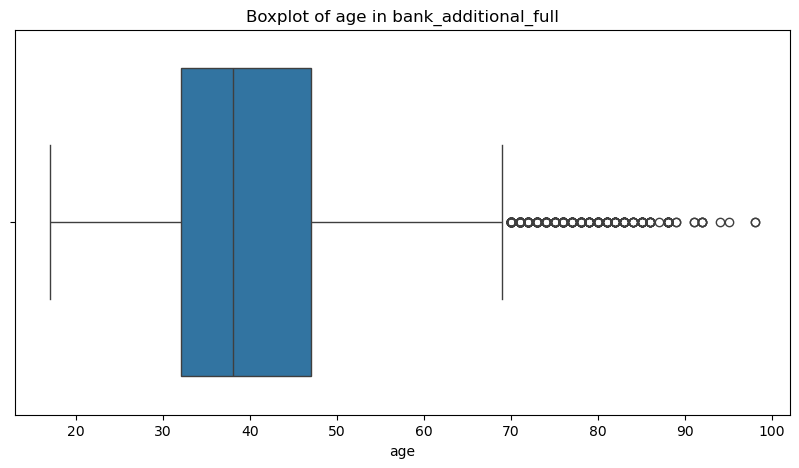

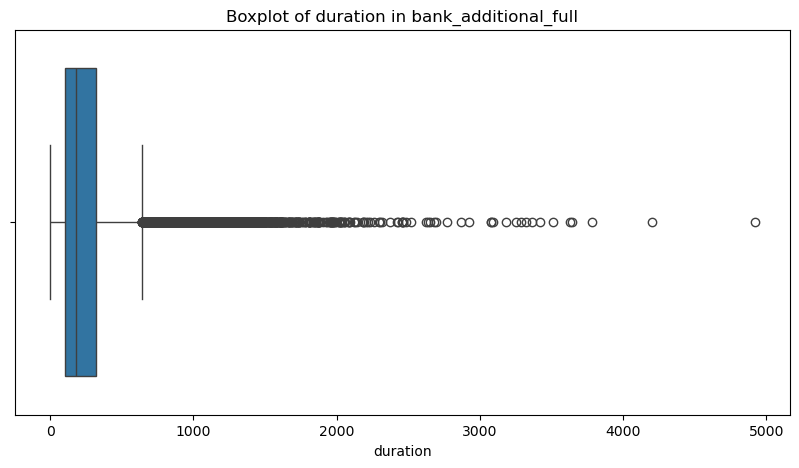

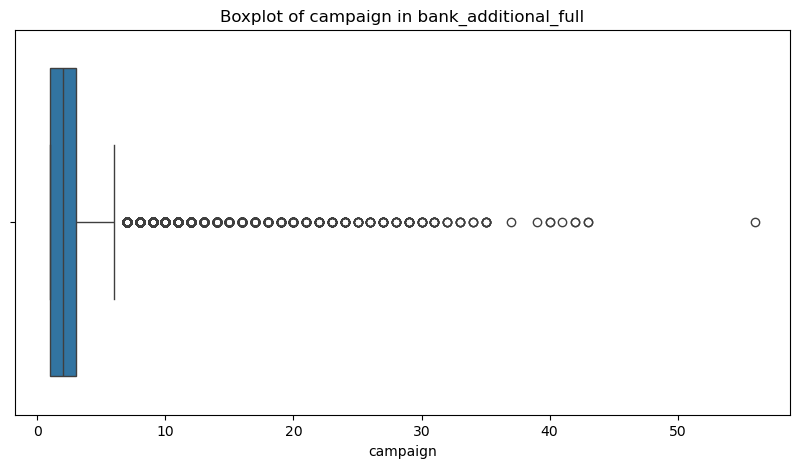

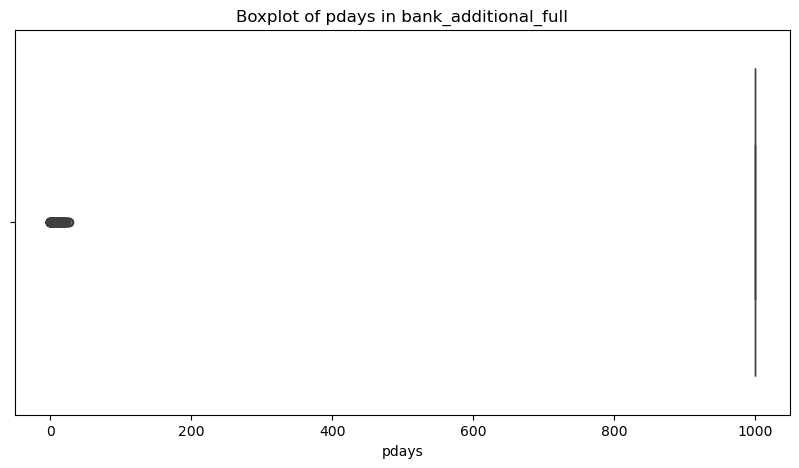

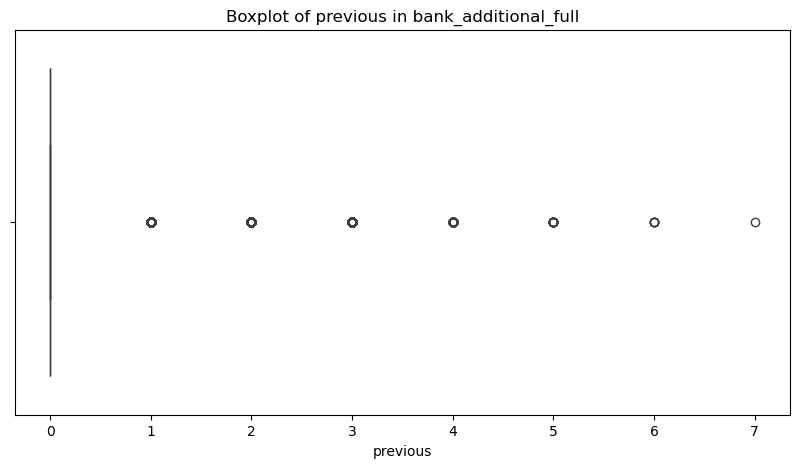

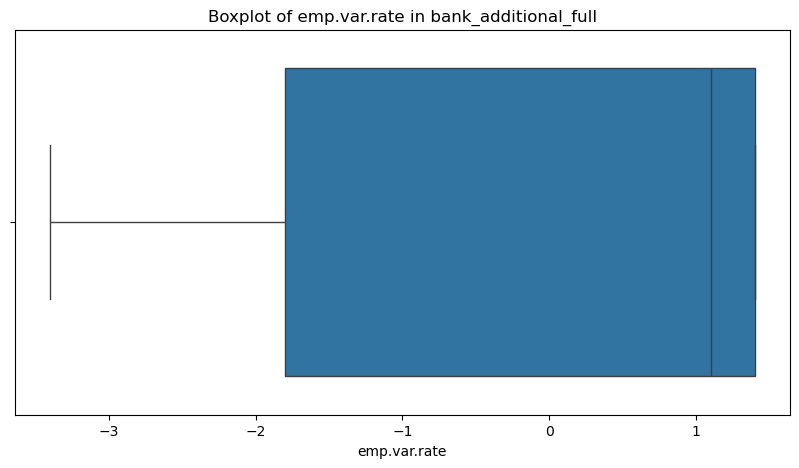

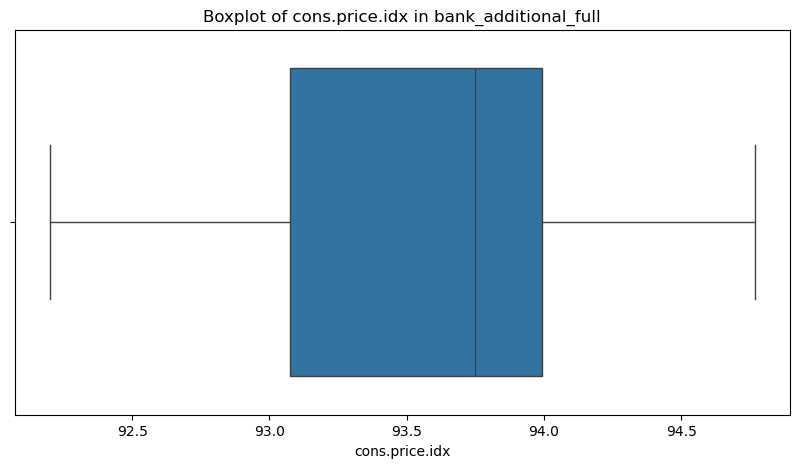

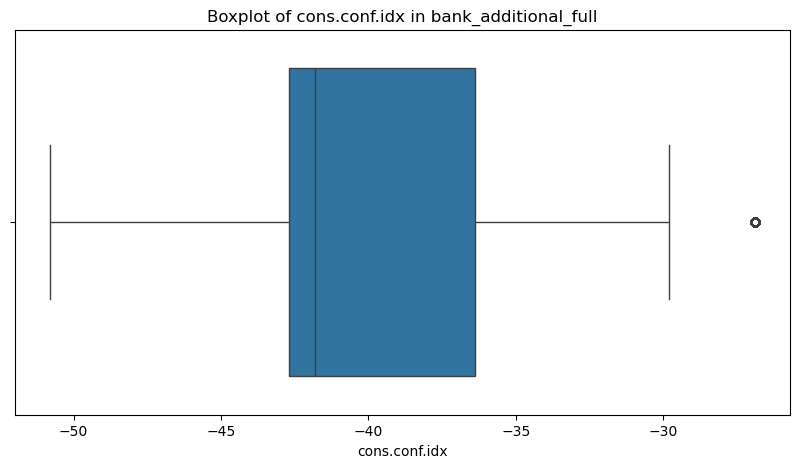

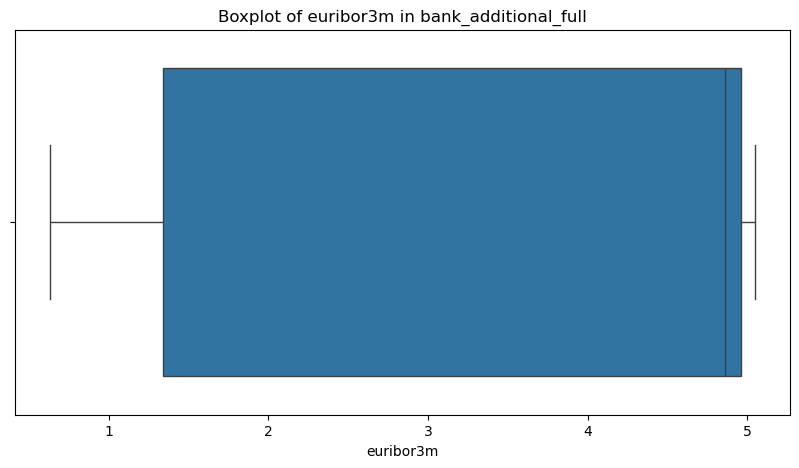

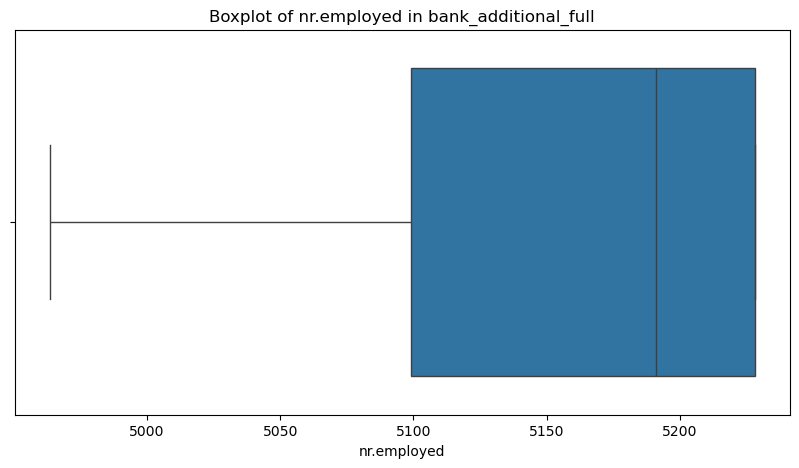


bank_additional - Outlier Detection


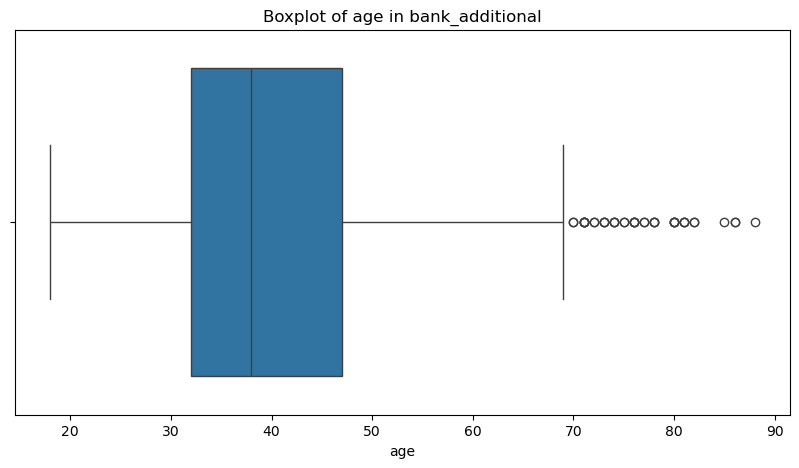

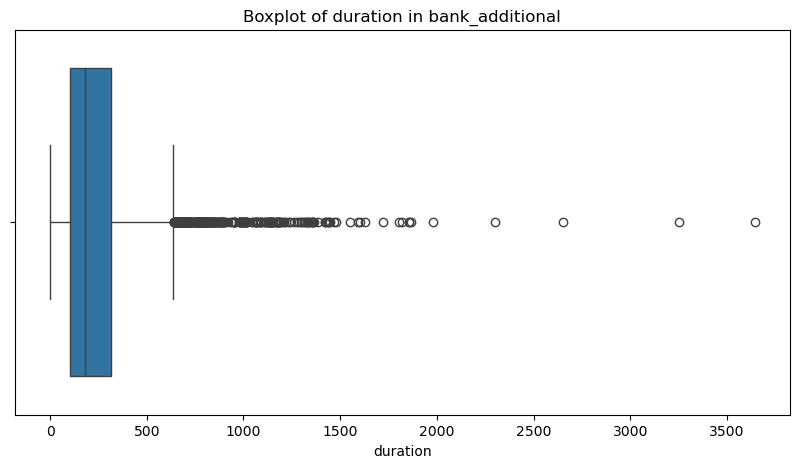

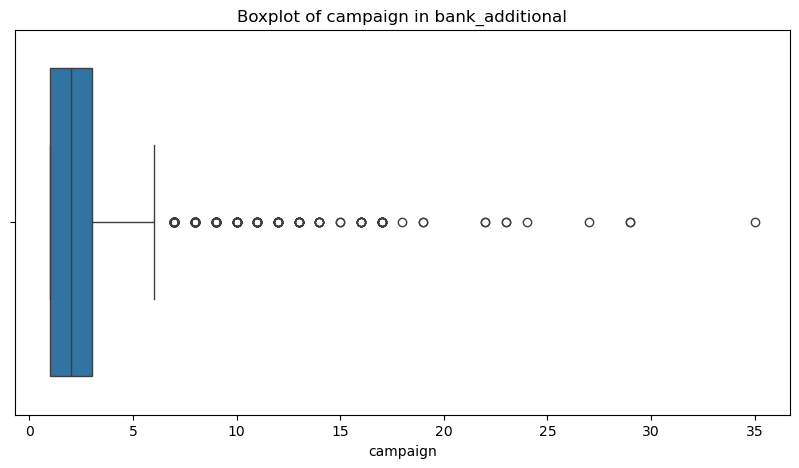

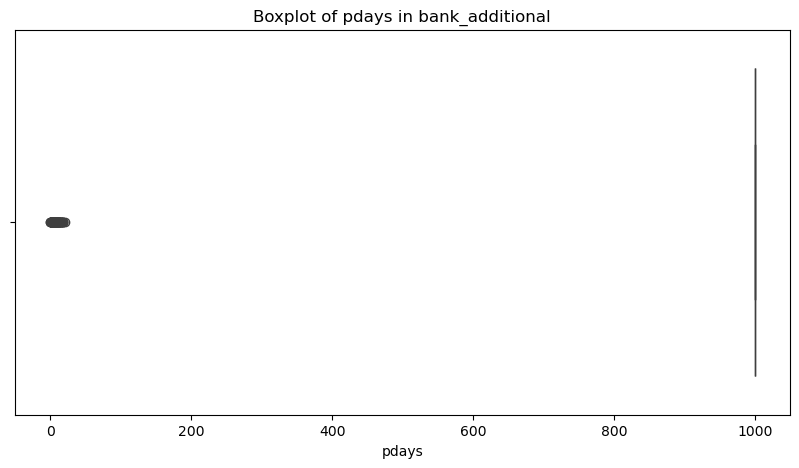

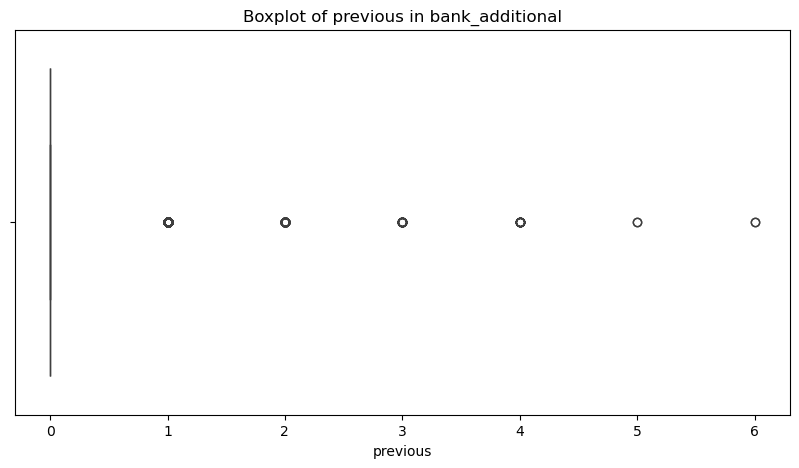

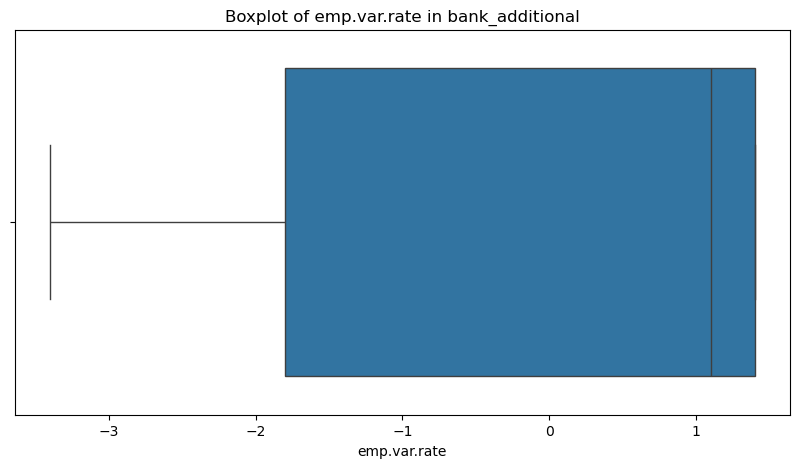

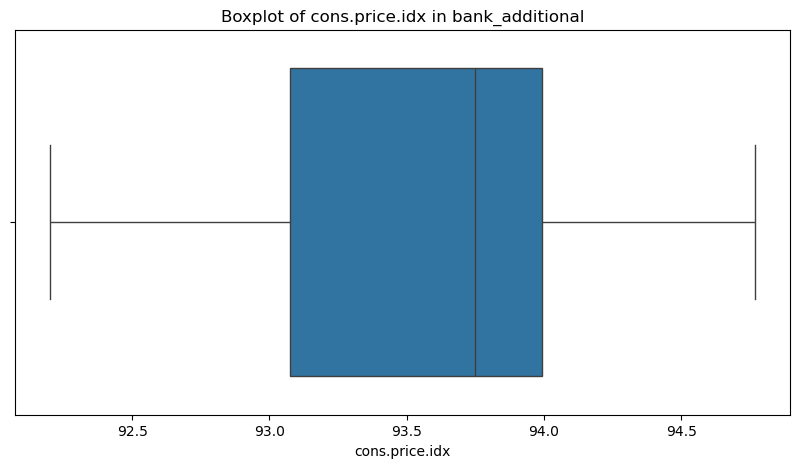

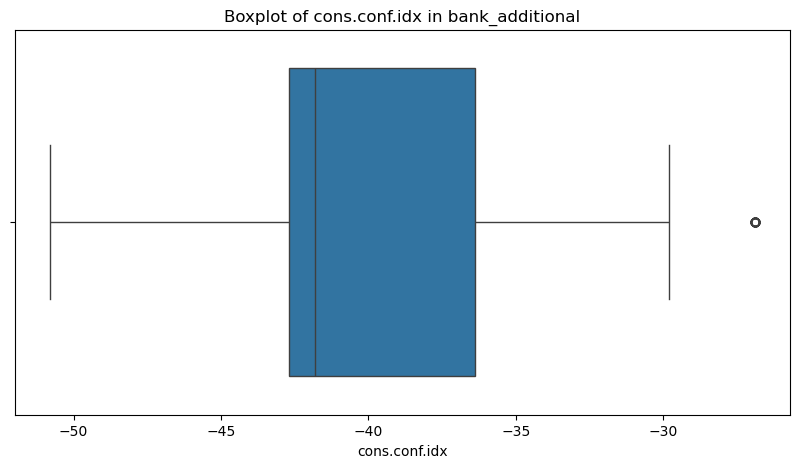

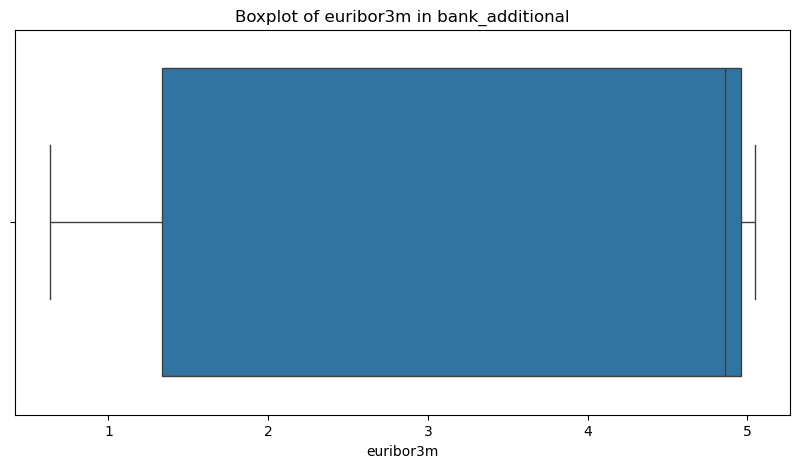

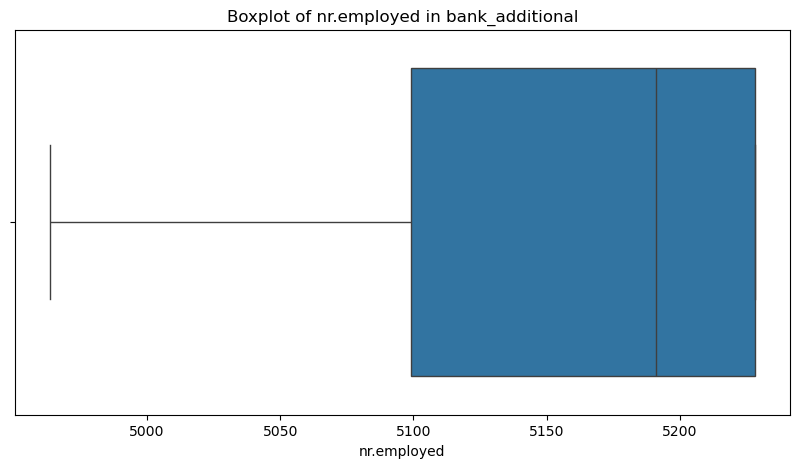


bank_full - Outlier Detection


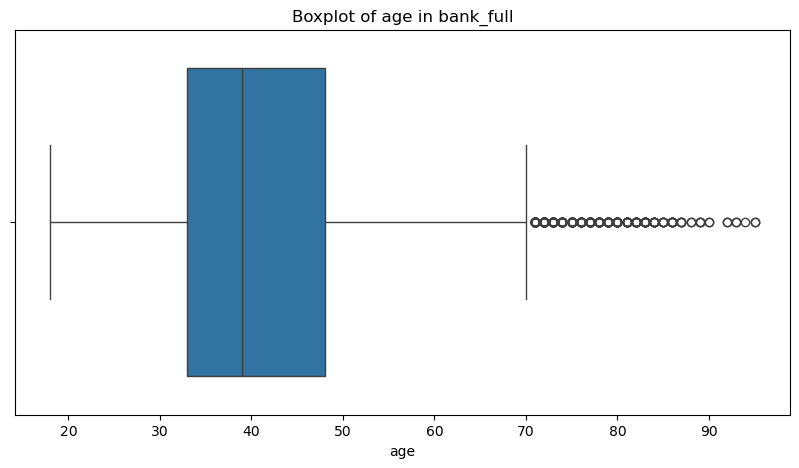

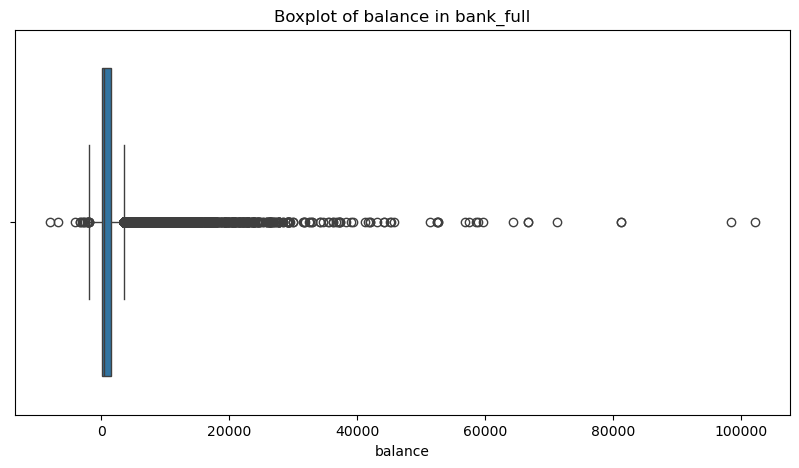

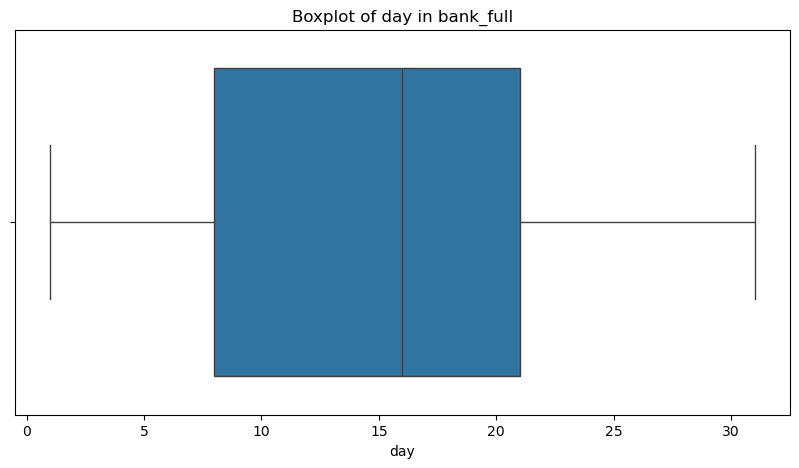

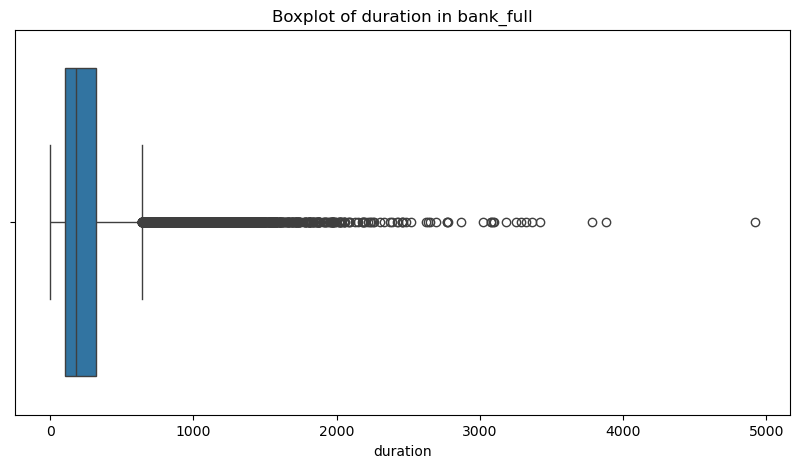

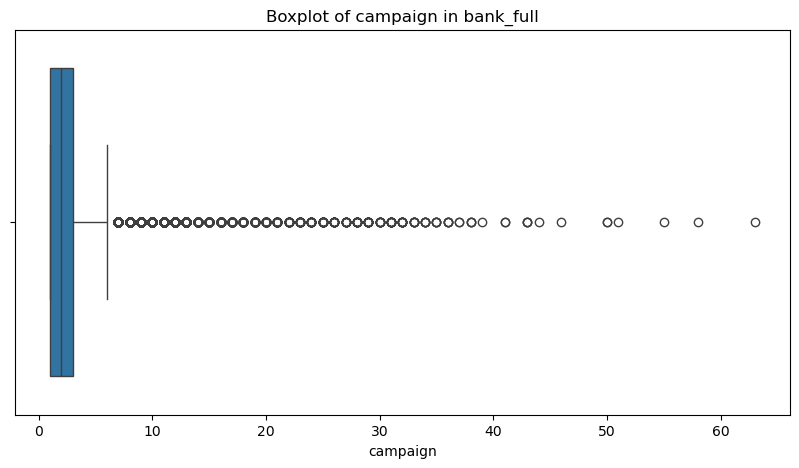

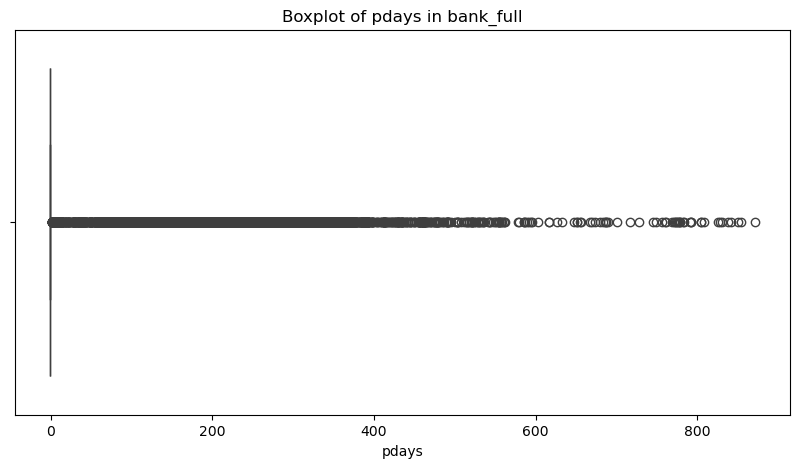

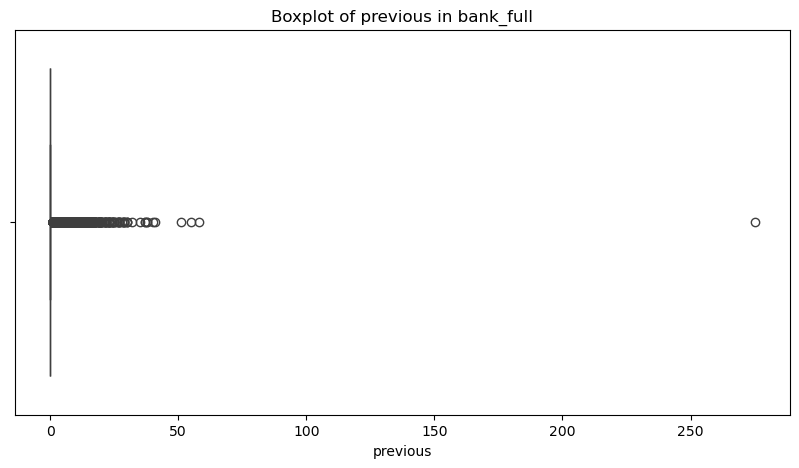


bank - Outlier Detection


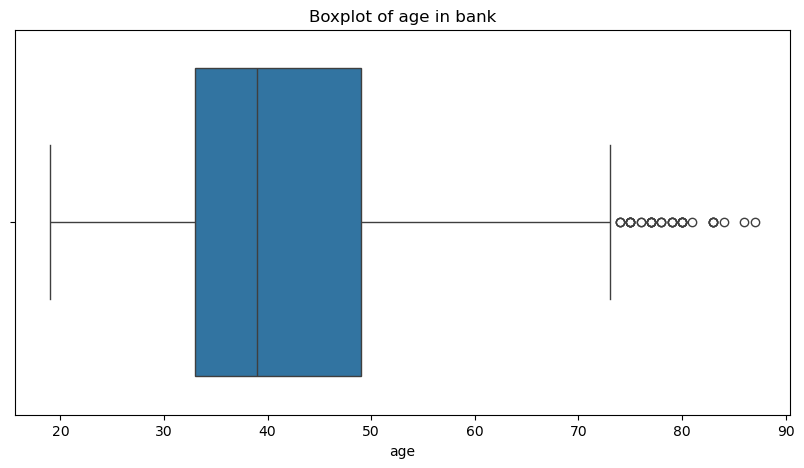

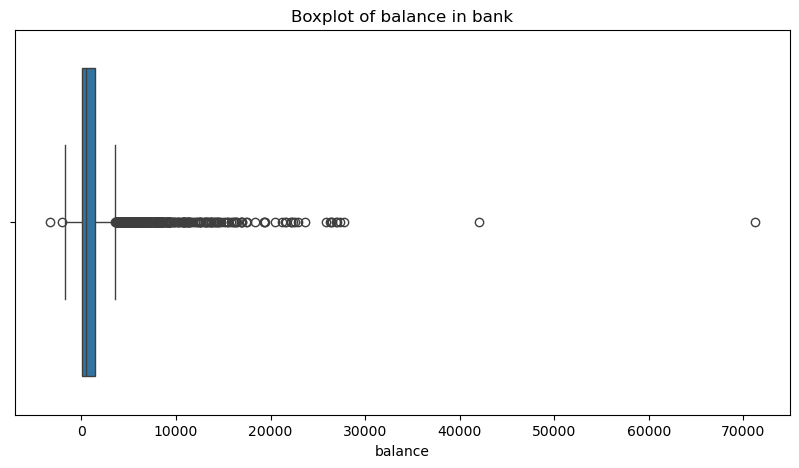

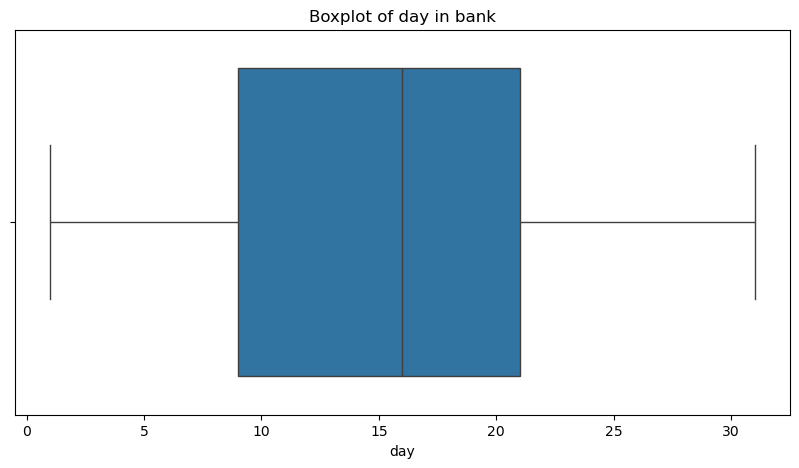

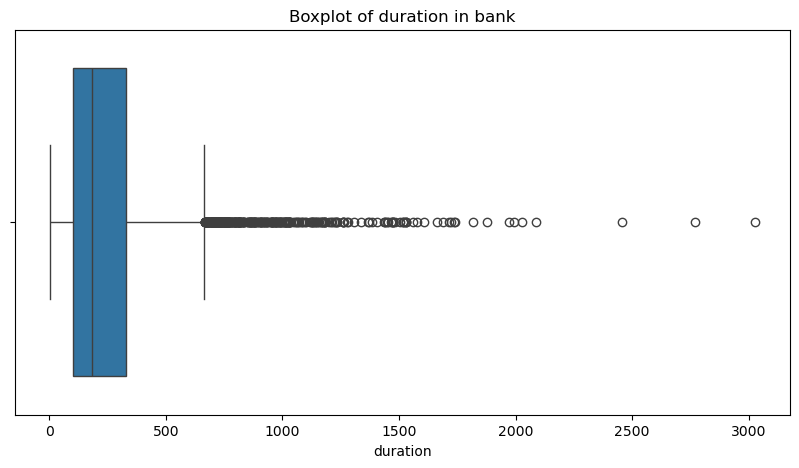

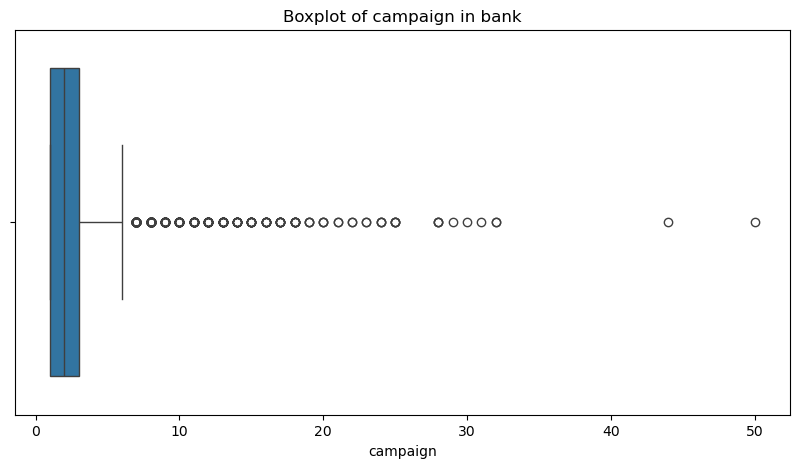

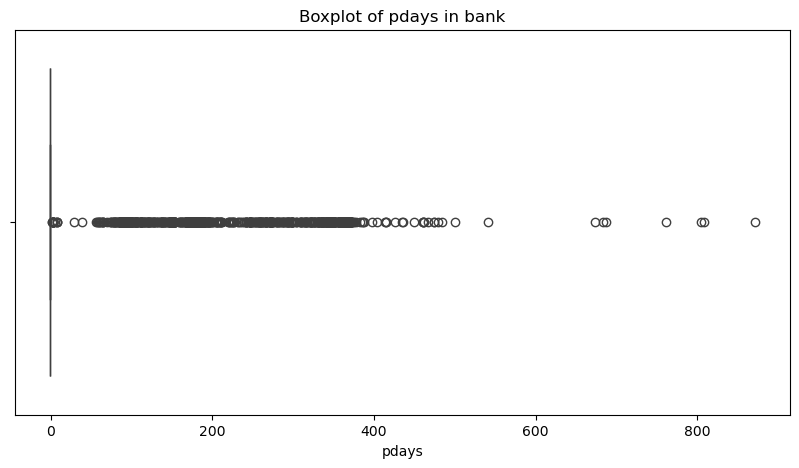

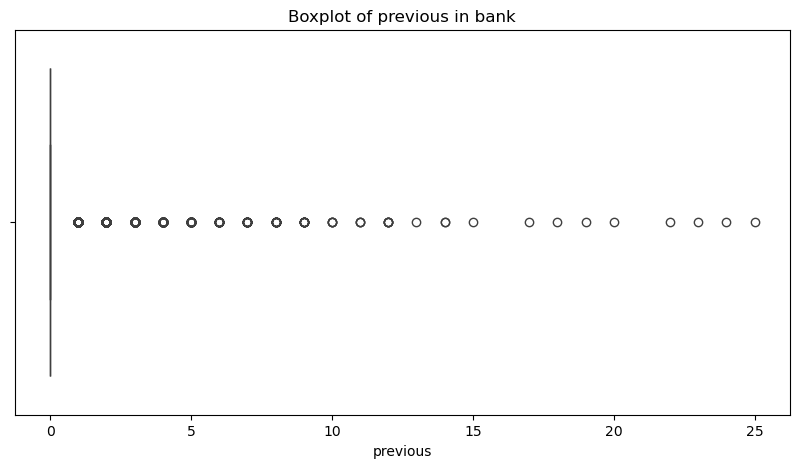

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection using boxplots for numerical columns
# bank_additional_full
print("\nbank_additional_full - Outlier Detection")
numeric_cols_additional_full = bank_additional_full.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols_additional_full:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=bank_additional_full, x=col)
    plt.title(f"Boxplot of {col} in bank_additional_full")
    plt.show()

# bank_additional
print("\nbank_additional - Outlier Detection")
numeric_cols_additional = bank_additional.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols_additional:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=bank_additional, x=col)
    plt.title(f"Boxplot of {col} in bank_additional")
    plt.show()

# bank_full
print("\nbank_full - Outlier Detection")
numeric_cols_full = bank_full.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols_full:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=bank_full, x=col)
    plt.title(f"Boxplot of {col} in bank_full")
    plt.show()

# bank
print("\nbank - Outlier Detection")
numeric_cols_bank = bank.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols_bank:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=bank, x=col)
    plt.title(f"Boxplot of {col} in bank")
    plt.show()


In [14]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter data to keep only non-outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Removing outliers from all numerical columns in the datasets
def remove_outliers_from_dataset(df, name):
    print(f"\nRemoving outliers from {name}...")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        before = df.shape[0]
        df = remove_outliers_iqr(df, col)
        after = df.shape[0]
        print(f"{col}: Removed {before - after} outliers")
    return df

# Apply to each dataset
bank_additional_full_clean = remove_outliers_from_dataset(bank_additional_full, "bank_additional_full")
bank_additional_clean = remove_outliers_from_dataset(bank_additional, "bank_additional")
bank_full_clean = remove_outliers_from_dataset(bank_full, "bank_full")
bank_clean = remove_outliers_from_dataset(bank, "bank")

# Display shapes after outlier removal
print("\nShapes after outlier removal:")
print("bank_additional_full_clean shape:", bank_additional_full_clean.shape)
print("bank_additional_clean shape:", bank_additional_clean.shape)
print("bank_full_clean shape:", bank_full_clean.shape)
print("bank_clean shape:", bank_clean.shape)



Removing outliers from bank_additional_full...
age: Removed 469 outliers
duration: Removed 2935 outliers
campaign: Removed 2249 outliers
pdays: Removed 1268 outliers
previous: Removed 3694 outliers
emp.var.rate: Removed 1543 outliers
cons.price.idx: Removed 0 outliers
cons.conf.idx: Removed 0 outliers
euribor3m: Removed 5924 outliers
nr.employed: Removed 0 outliers

Removing outliers from bank_additional...
age: Removed 39 outliers
duration: Removed 290 outliers
campaign: Removed 223 outliers
pdays: Removed 135 outliers
previous: Removed 397 outliers
emp.var.rate: Removed 155 outliers
cons.price.idx: Removed 0 outliers
cons.conf.idx: Removed 0 outliers
euribor3m: Removed 573 outliers
nr.employed: Removed 0 outliers

Removing outliers from bank_full...
age: Removed 487 outliers
balance: Removed 4696 outliers
day: Removed 0 outliers
duration: Removed 2878 outliers
campaign: Removed 2587 outliers
pdays: Removed 6494 outliers
previous: Removed 0 outliers

Removing outliers from bank...
ag

In [15]:
def factorize_categorical_columns(df, name):
    print(f"\nFactorizing categorical columns in {name}...")
    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        # Apply factorization
        df[col], uniques = pd.factorize(df[col])
        print(f"Factorized {col}: {len(uniques)} unique values")
    return df

# Apply factorization to each dataset
bank_additional_full_clean = factorize_categorical_columns(bank_additional_full_clean, "bank_additional_full_clean")
bank_additional_clean = factorize_categorical_columns(bank_additional_clean, "bank_additional_clean")
bank_full_clean = factorize_categorical_columns(bank_full_clean, "bank_full_clean")
bank_clean = factorize_categorical_columns(bank_clean, "bank_clean")

# Display preview of cleaned and factorized datasets
print("\nPreview of bank_additional_full_clean:")
print(bank_additional_full_clean.head())

print("\nPreview of bank_additional_clean:")
print(bank_additional_clean.head())

print("\nPreview of bank_full_clean:")
print(bank_full_clean.head())

print("\nPreview of bank_clean:")
print(bank_clean.head())



Factorizing categorical columns in bank_additional_full_clean...
Factorized job: 12 unique values
Factorized marital: 4 unique values
Factorized education: 8 unique values
Factorized default: 3 unique values
Factorized housing: 3 unique values
Factorized loan: 3 unique values
Factorized contact: 2 unique values
Factorized month: 7 unique values
Factorized day_of_week: 5 unique values
Factorized poutcome: 1 unique values
Factorized y: 2 unique values

Factorizing categorical columns in bank_additional_clean...
Factorized job: 12 unique values
Factorized marital: 4 unique values
Factorized education: 7 unique values
Factorized default: 2 unique values
Factorized housing: 3 unique values
Factorized loan: 3 unique values
Factorized contact: 2 unique values
Factorized month: 7 unique values
Factorized day_of_week: 5 unique values
Factorized poutcome: 1 unique values
Factorized y: 2 unique values

Factorizing categorical columns in bank_full_clean...
Factorized job: 12 unique values
Factori


Distribution analysis for bank_additional_full_clean...


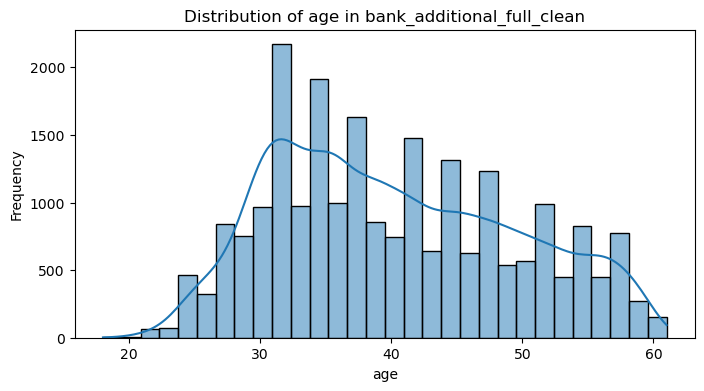

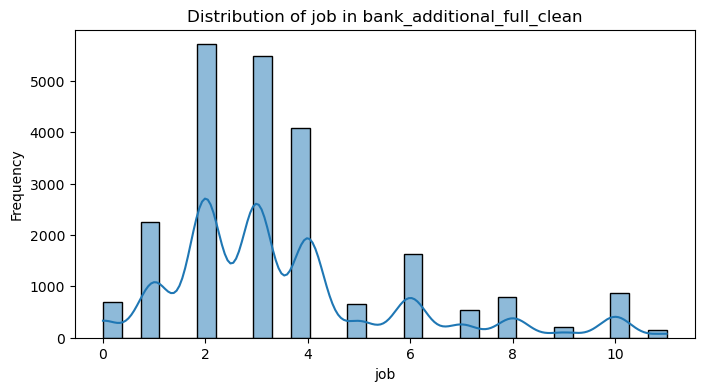

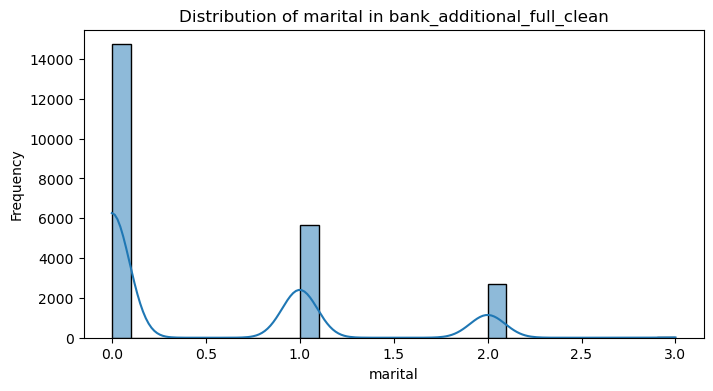

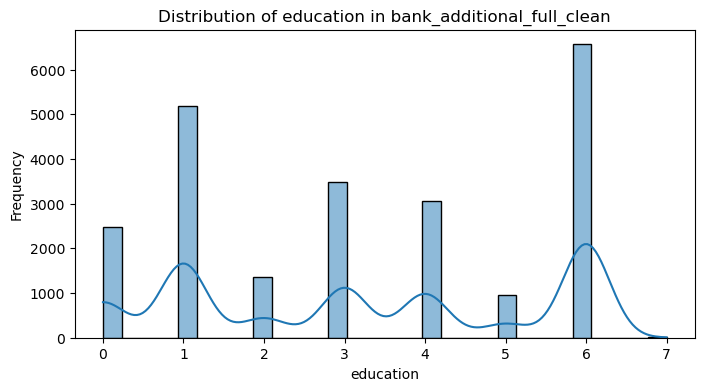

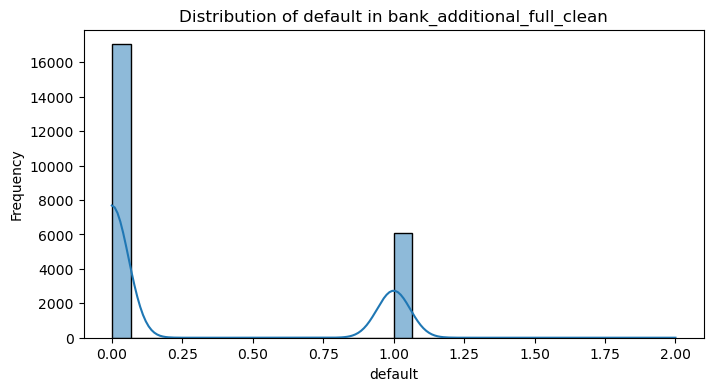

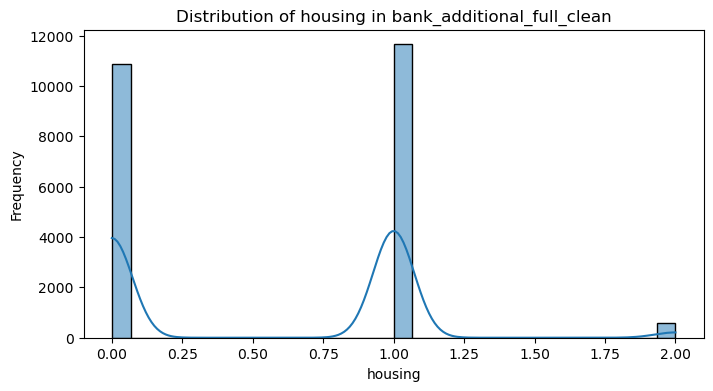

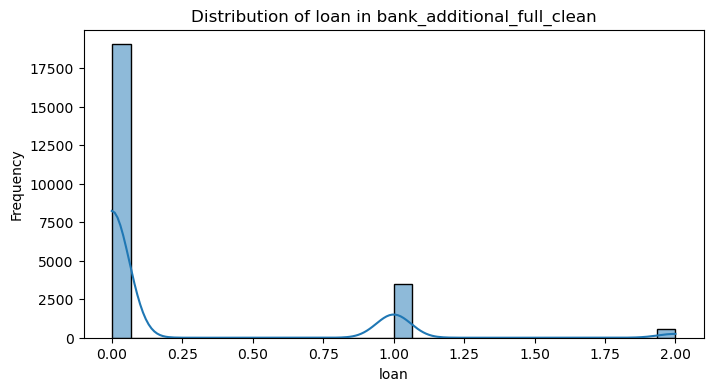

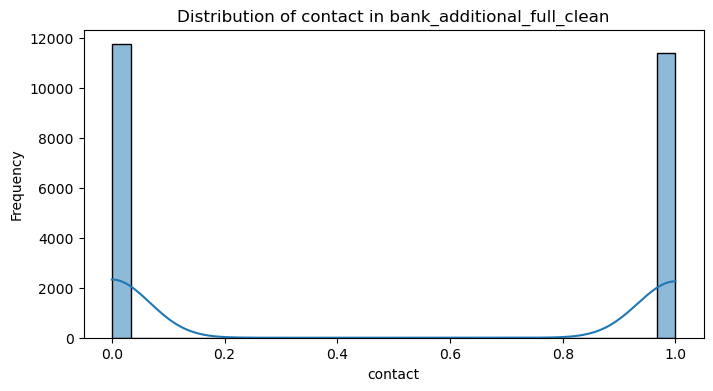

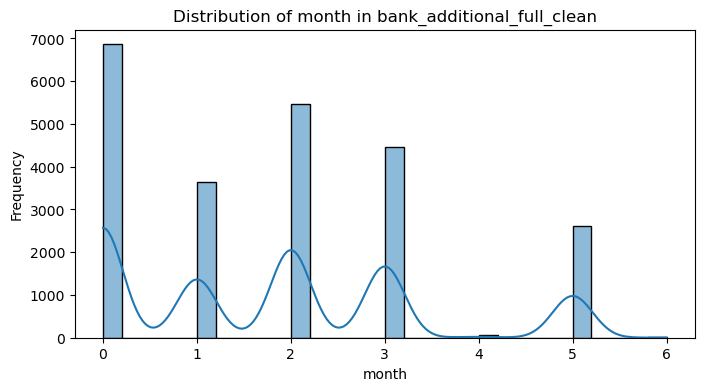

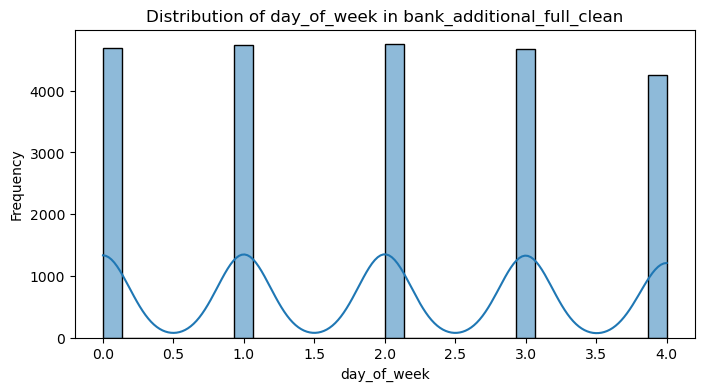

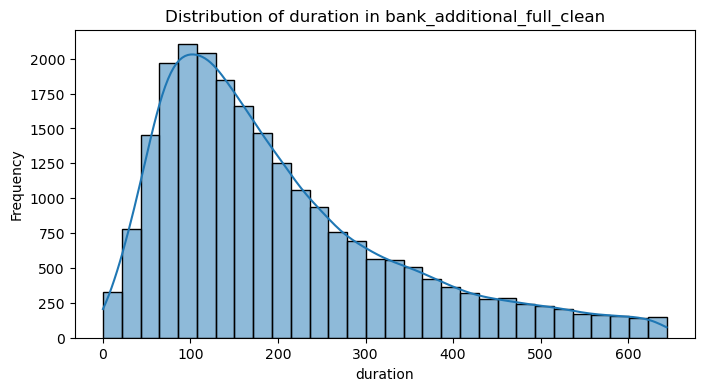

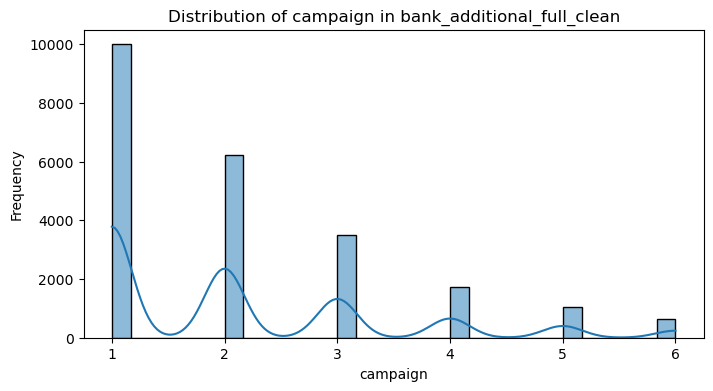

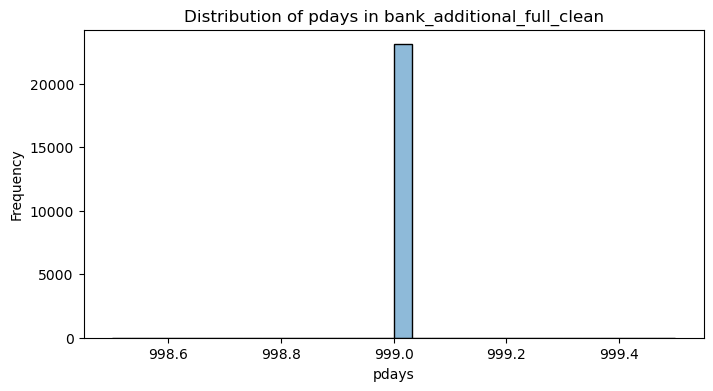

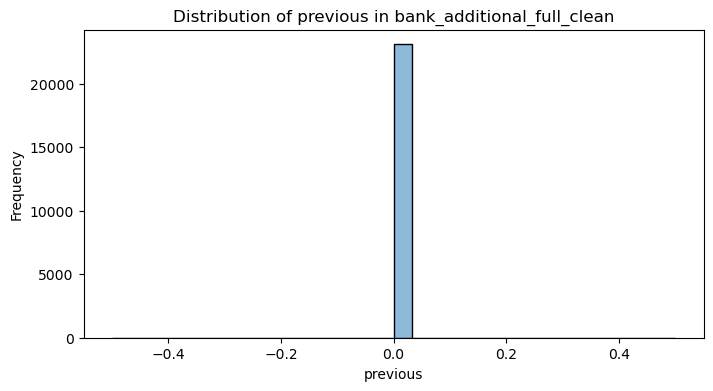

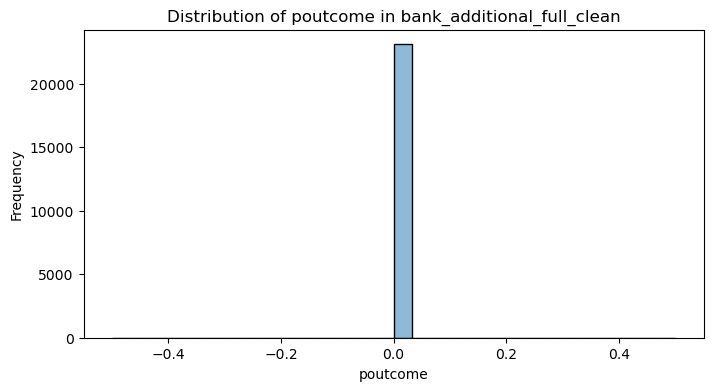

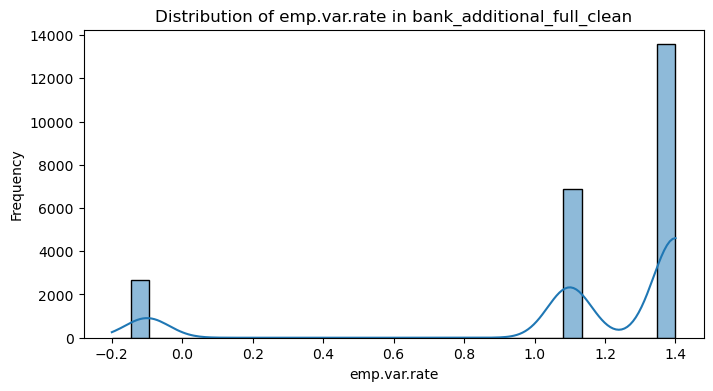

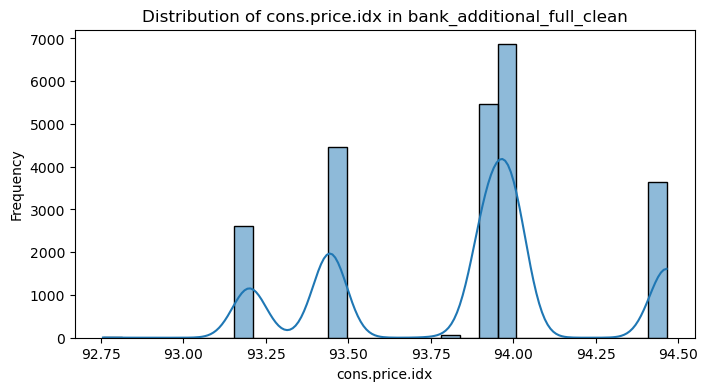

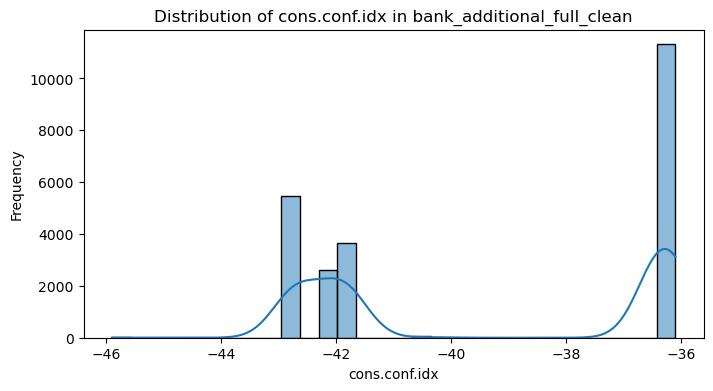

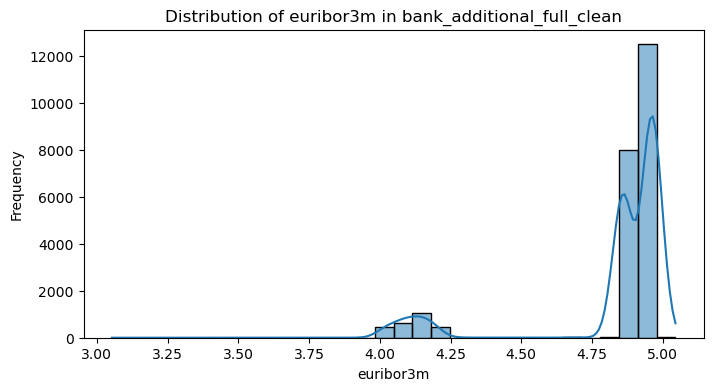

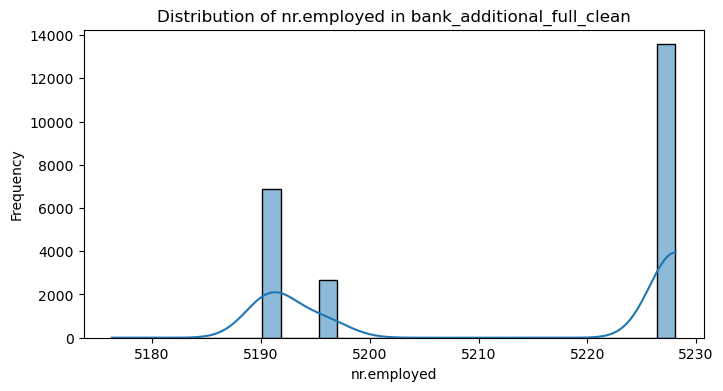

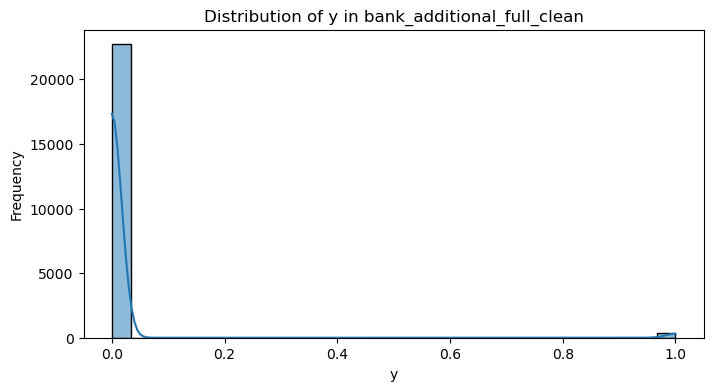

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution analysis for numerical columns
def plot_distributions(df, name):
    print(f"\nDistribution analysis for {name}...")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col} in {name}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

plot_distributions(bank_additional_full_clean, "bank_additional_full_clean")



Correlation heatmap for bank_additional_full_clean...


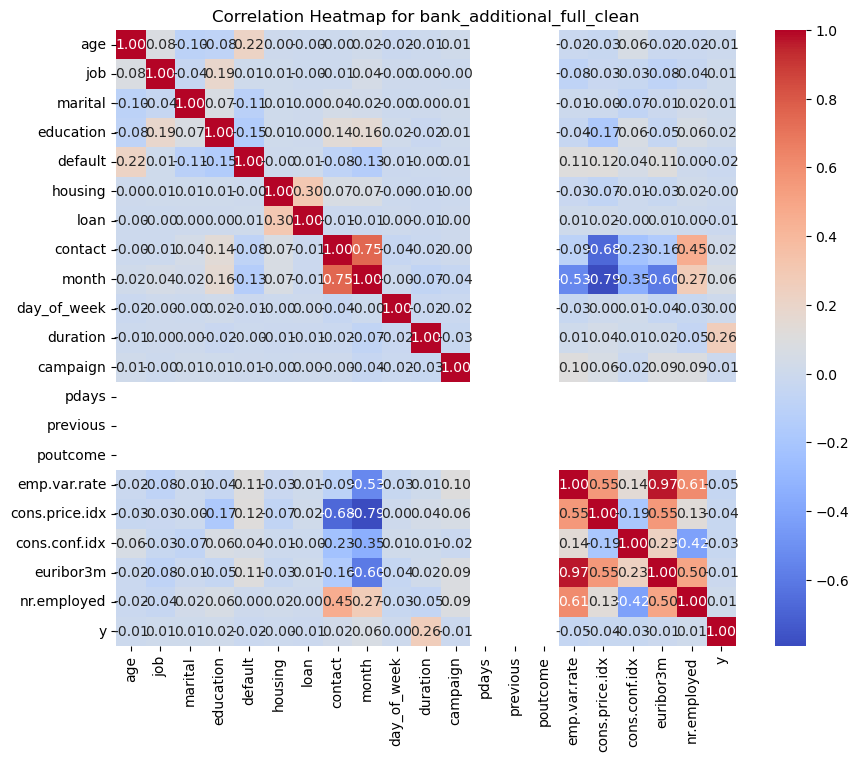

In [17]:
# Correlation heatmap
def plot_correlation_heatmap(df, name):
    print(f"\nCorrelation heatmap for {name}...")
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap for {name}")
    plt.show()

plot_correlation_heatmap(bank_additional_full_clean, "bank_additional_full_clean")



Target variable analysis for bank_additional_full_clean...


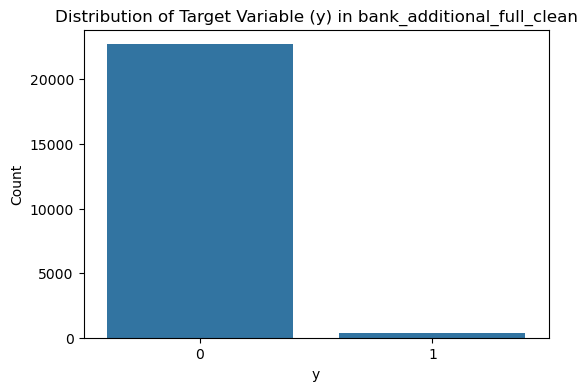

In [18]:
# Target variable distribution
def plot_target_variable(df, name, target='y'):
    print(f"\nTarget variable analysis for {name}...")
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=target)
    plt.title(f"Distribution of Target Variable ({target}) in {name}")
    plt.xlabel(target)
    plt.ylabel("Count")
    plt.show()

plot_target_variable(bank_additional_full_clean, "bank_additional_full_clean")


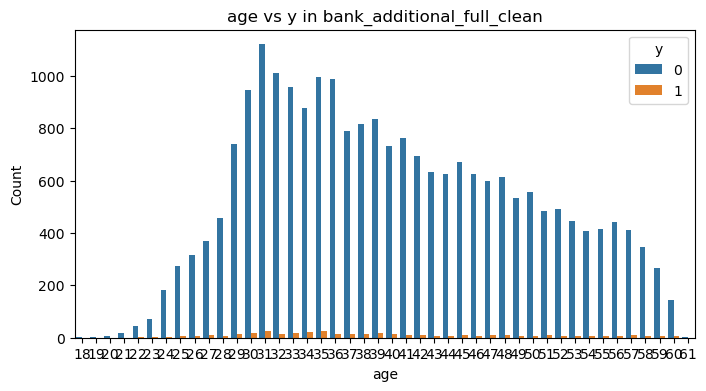

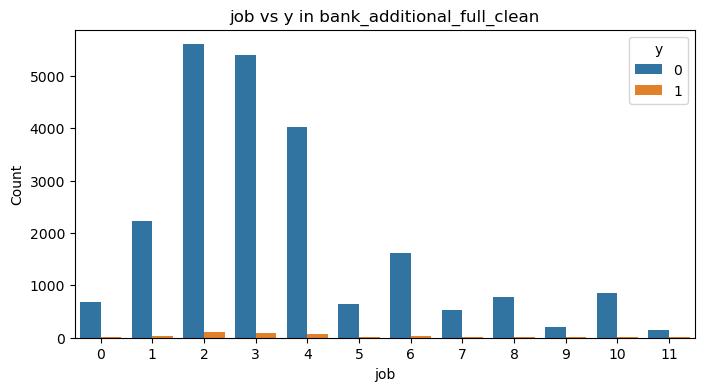

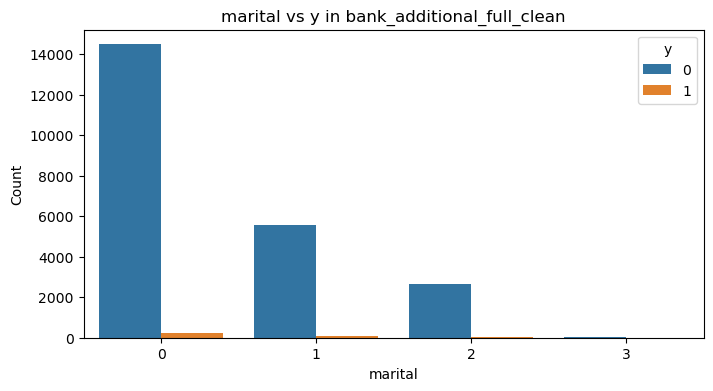

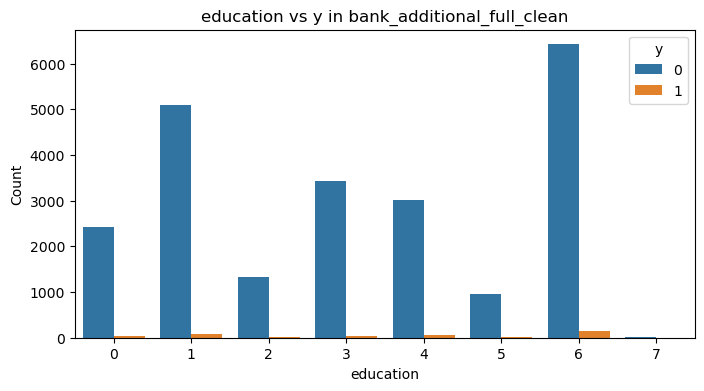

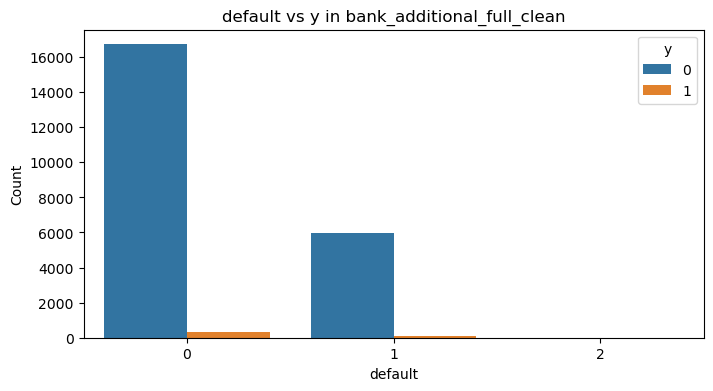

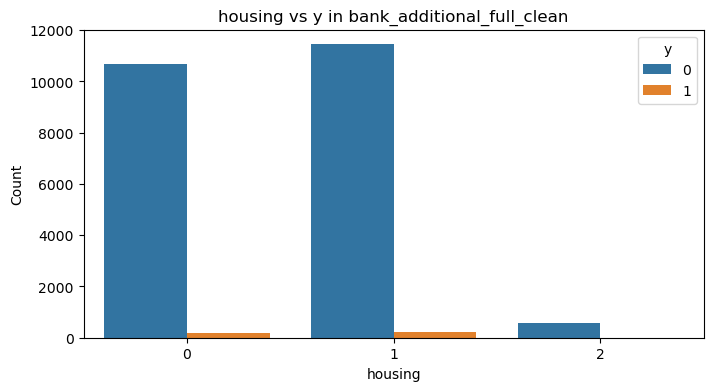

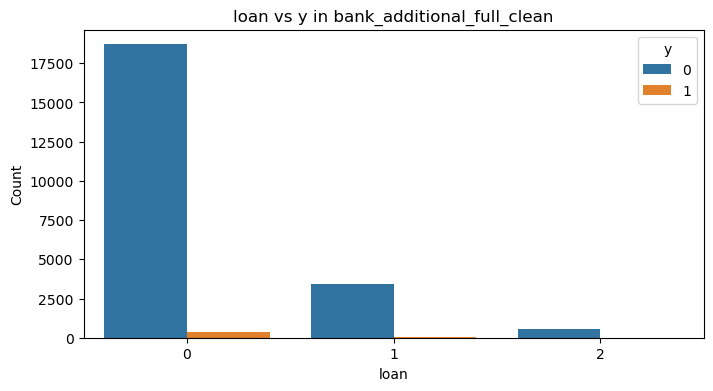

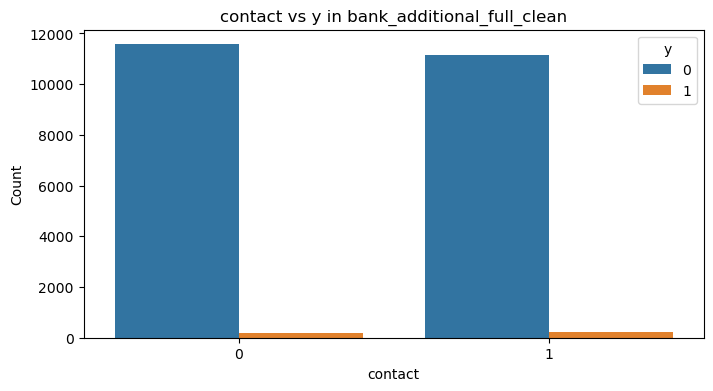

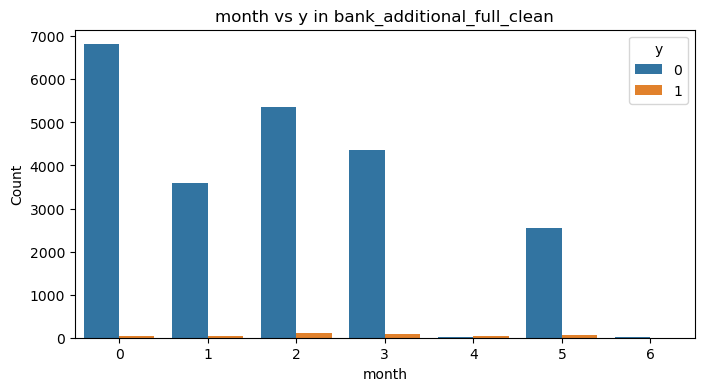

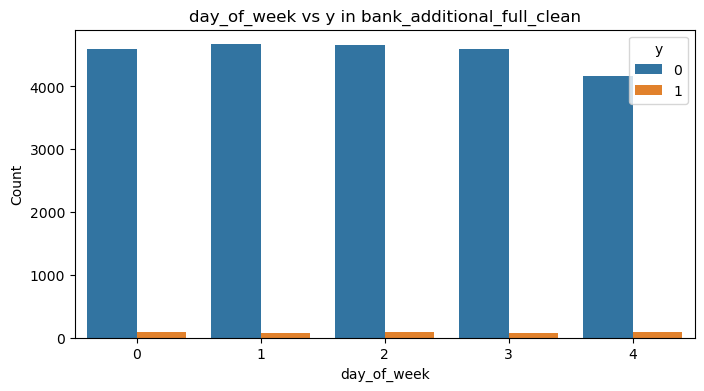

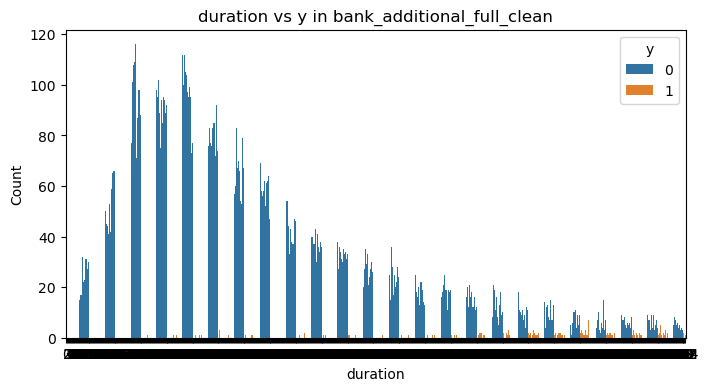

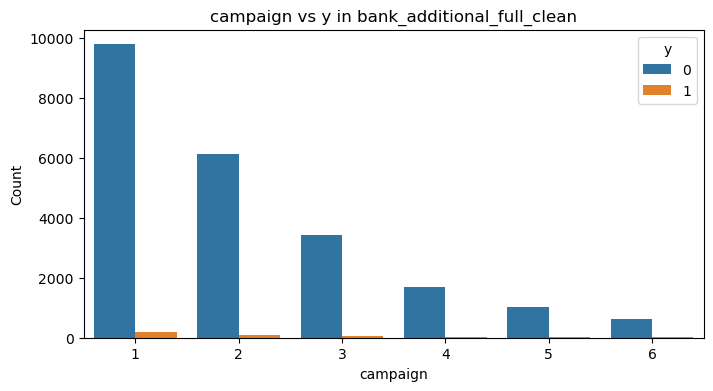

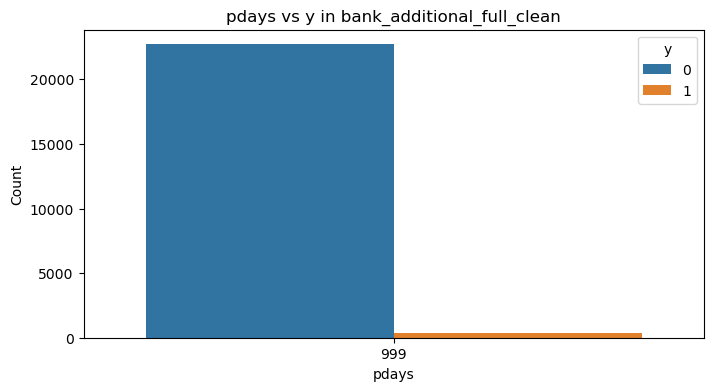

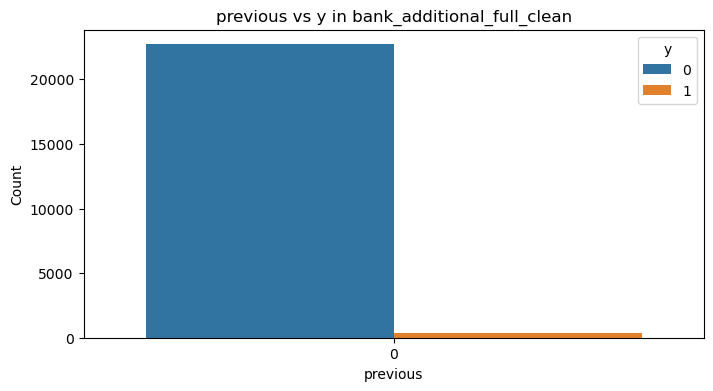

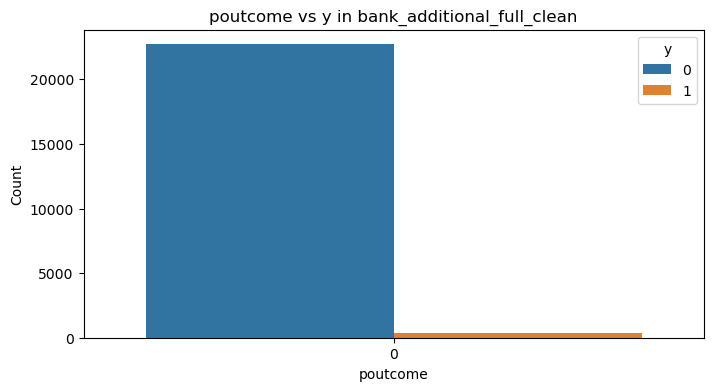

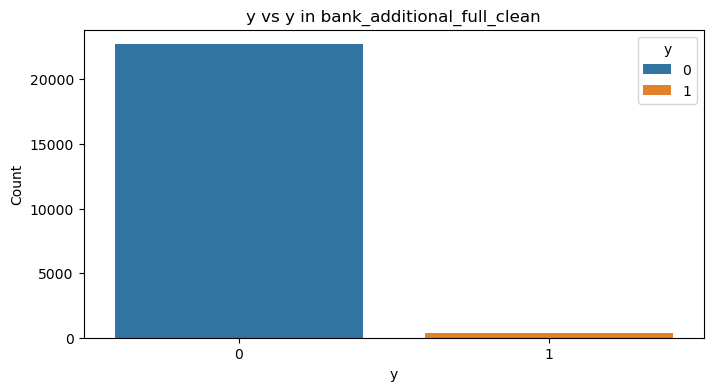

In [19]:
def plot_categorical_vs_target(df, name, target='y'):
    categorical_cols = df.select_dtypes(include=['int64', 'category']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue=target)
        plt.title(f"{col} vs {target} in {name}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.legend(title=target)
        plt.show()

plot_categorical_vs_target(bank_additional_full_clean, "bank_additional_full_clean")


In [20]:
bank_additional_full_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


### Featuure Engineering

In [22]:
bank_additional_full_clean['call_effectiveness'] = bank_additional_full_clean['campaign'] / (bank_additional_full_clean['previous'] + 1)


In [23]:
bank_additional_full_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_effectiveness
0,56,0,0,0,0,0,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1.0
1,57,1,0,1,1,0,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1.0
2,37,1,0,1,0,1,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1.0
3,40,2,0,2,0,0,0,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1.0
4,56,1,0,1,0,0,1,0,0,0,...,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,1.0


In [24]:
bank_additional_full_clean['age_group'] = pd.cut(bank_additional_full_clean['age'], bins=[0, 25, 50, 75, 100], labels=['Young', 'Mid-age', 'Senior', 'Elderly'])


In [25]:
bank_additional_full_clean['is_weekend'] = bank_additional_full_clean['day_of_week'].isin(['sat', 'sun']).astype(int)


In [26]:
# Factorize the 'age_group' column
bank_additional_full_clean['age_group'], age_group_mapping = pd.factorize(bank_additional_full_clean['age_group'])

# Display the mapping
print("Age group mapping:", dict(enumerate(age_group_mapping)))

# Verify the changes
print(bank_additional_full_clean[['age_group']].head())


Age group mapping: {0: 'Senior', 1: 'Mid-age', 2: 'Young'}
   age_group
0          0
1          0
2          1
3          1
4          0


In [27]:
bank_additional_full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23106 entries, 0 to 27689
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 23106 non-null  int64  
 1   job                 23106 non-null  int64  
 2   marital             23106 non-null  int64  
 3   education           23106 non-null  int64  
 4   default             23106 non-null  int64  
 5   housing             23106 non-null  int64  
 6   loan                23106 non-null  int64  
 7   contact             23106 non-null  int64  
 8   month               23106 non-null  int64  
 9   day_of_week         23106 non-null  int64  
 10  duration            23106 non-null  int64  
 11  campaign            23106 non-null  int64  
 12  pdays               23106 non-null  int64  
 13  previous            23106 non-null  int64  
 14  poutcome            23106 non-null  int64  
 15  emp.var.rate        23106 non-null  float64
 16  cons.pric

In [28]:
print(bank_additional_full.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [29]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numeric_cols = ['duration', 'campaign', 'pdays', 'previous', 
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                'euribor3m', 'nr.employed']

# Apply standard scaling
scaler = StandardScaler()
bank_additional_full_clean[numeric_cols] = scaler.fit_transform(bank_additional_full_clean[numeric_cols])

print("Standard scaling applied to numeric columns.")


Standard scaling applied to numeric columns.


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
numeric_cols = ['duration', 'campaign', 'pdays', 'previous', 
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                'euribor3m', 'nr.employed']

# Ensure all columns exist in the dataset
numeric_cols = [col for col in numeric_cols if col in bank_additional_full_clean.columns]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
bank_additional_full_clean[numeric_cols] = scaler.fit_transform(bank_additional_full_clean[numeric_cols])

print("Min-Max scaling applied to the following columns:", numeric_cols)


Min-Max scaling applied to the following columns: ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [31]:
import numpy as np
bank_additional_full_clean['log_duration'] = np.log1p(bank_additional_full_clean['duration'])


In [32]:
bank_additional_full_clean.drop(['duration'], axis=1, inplace=True)


In [33]:
# Define features (X) and target (y)
X = bank_additional_full_clean.drop(columns=['y'])  # Features
y = bank_additional_full_clean['y']  # Target


In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       1.00      0.09      0.17        87

    accuracy                           0.98      4622
   macro avg       0.99      0.55      0.58      4622
weighted avg       0.98      0.98      0.98      4622



In [78]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))


Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4535
           1       0.25      0.22      0.23        87

    accuracy                           0.97      4622
   macro avg       0.62      0.60      0.61      4622
weighted avg       0.97      0.97      0.97      4622



In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.81      0.15      0.25        87

    accuracy                           0.98      4622
   macro avg       0.90      0.57      0.62      4622
weighted avg       0.98      0.98      0.98      4622



In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.60      0.10      0.18        87

    accuracy                           0.98      4622
   macro avg       0.79      0.55      0.58      4622
weighted avg       0.98      0.98      0.98      4622



In [84]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))


XGBoost:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.52      0.18      0.27        87

    accuracy                           0.98      4622
   macro avg       0.75      0.59      0.63      4622
weighted avg       0.98      0.98      0.98      4622



In [86]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print("LightGBM:\n", classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 310, number of negative: 18174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 18484, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016771 -> initscore=-4.071175
[LightGBM] [Info] Start training from score -4.071175
LightGBM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.52      0.14      0.22        87

    accuracy                           0.98      4622
   macro avg       0.75      0.57      0.60      4622
weighted avg       0.97      0.98      0.98      4622



In [88]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose=0, random_state=42)
cb.fit(X_train, y_train)
y_pred_cb = cb.predict(X_test)
print("CatBoost:\n", classification_report(y_test, y_pred_cb))


CatBoost:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.71      0.17      0.28        87

    accuracy                           0.98      4622
   macro avg       0.85      0.59      0.63      4622
weighted avg       0.98      0.98      0.98      4622



In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.73      0.13      0.22        87

    accuracy                           0.98      4622
   macro avg       0.86      0.56      0.60      4622
weighted avg       0.98      0.98      0.98      4622



In [92]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("Multilayer Perceptron:\n", classification_report(y_test, y_pred_mlp))


Multilayer Perceptron:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4535
           1       0.41      0.25      0.31        87

    accuracy                           0.98      4622
   macro avg       0.70      0.62      0.65      4622
weighted avg       0.97      0.98      0.98      4622



In [94]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Support Vector Machine:\n", classification_report(y_test, y_pred_svc))


Support Vector Machine:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.91      0.11      0.20        87

    accuracy                           0.98      4622
   macro avg       0.95      0.56      0.60      4622
weighted avg       0.98      0.98      0.98      4622



In [96]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "CatBoost": cb,
    "KNN": knn,
    "SVM": svc,
    "MLP": mlp
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

# Display results
print("\nModel Performance:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")



Model Performance:
Logistic Regression: 0.9829
Decision Tree: 0.9727
Random Forest: 0.9833
Gradient Boosting: 0.9818
XGBoost: 0.9814
LightGBM: 0.9814
CatBoost: 0.9831
KNN: 0.9827
SVM: 0.9831
MLP: 0.9790


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.9843648968919458


In [100]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the parameter grid
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10, 20],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_distributions, n_iter=50, cv=5,
                                   scoring='accuracy', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Display the best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best Cross-Validated Accuracy: 0.984310769700951


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')

# Display the results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Scores: [0.9843116  0.98322965 0.98350014 0.98404111 0.98457792]
Mean Accuracy: 0.9839320842803396
Standard Deviation: 0.0005006054810214826


In [104]:
# Train the final model with best hyperparameters
final_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
final_rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_final = final_rf.predict(X_test)

# Evaluate metrics
from sklearn.metrics import classification_report
print("Final Model Performance on Test Set:\n", classification_report(y_test, y_pred_final))


Final Model Performance on Test Set:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.80      0.14      0.24        87

    accuracy                           0.98      4622
   macro avg       0.89      0.57      0.61      4622
weighted avg       0.98      0.98      0.98      4622



In [112]:
# Train all models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 310, number of negative: 18174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 18484, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016771 -> initscore=-4.071175
[LightGBM] [Info] Start training from score -4.071175
Training CatBoost...
Training KNN...
Training SVM...
Training MLP...


In [113]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
    }
    
    if y_proba is not None:
        metrics["ROC-AUC"] = roc_auc_score(y_test, y_proba)

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return metrics


In [116]:
# Define the models
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "CatBoost": cb,
    "KNN": knn,
    "SVM": svc,
    "MLP": mlp,
}

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    metrics = evaluate_model(model, X_test, y_test)
    results[name] = metrics


Evaluating Logistic Regression...

Confusion Matrix:
[[4535    0]
 [  79    8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       1.00      0.09      0.17        87

    accuracy                           0.98      4622
   macro avg       0.99      0.55      0.58      4622
weighted avg       0.98      0.98      0.98      4622

Evaluating Decision Tree...

Confusion Matrix:
[[4477   58]
 [  68   19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4535
           1       0.25      0.22      0.23        87

    accuracy                           0.97      4622
   macro avg       0.62      0.60      0.61      4622
weighted avg       0.97      0.97      0.97      4622

Evaluating Random Forest...

Confusion Matrix:
[[4532    3]
 [  74   13]]

Classification Report:
              precision    recall  f1-score   

In [120]:
# Convert results into a DataFrame for better visualization
import pandas as pd

results_df = pd.DataFrame(results).T  # Transpose to show metrics as columns
print("\nModel Evaluation Results:")
results_df



Model Evaluation Results:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.982908,1.000000,0.091954,0.168421,0.961799
Decision Tree,0.972739,0.246753,0.218391,0.231707,0.602801
Random Forest,0.983341,0.812500,0.149425,0.252427,0.926915
Gradient Boosting,0.981826,0.600000,0.103448,0.176471,0.961794
XGBoost,0.981393,0.516129,0.183908,0.271186,0.950581
LightGBM,0.981393,0.521739,0.137931,0.218182,0.958347
CatBoost,0.983124,0.714286,0.172414,0.277778,0.950769
KNN,0.982691,0.733333,0.126437,0.215686,0.678957
SVM,0.983124,0.909091,0.114943,0.204082,NaN
MLP,0.979013,0.407407,0.252874,0.312057,0.922110


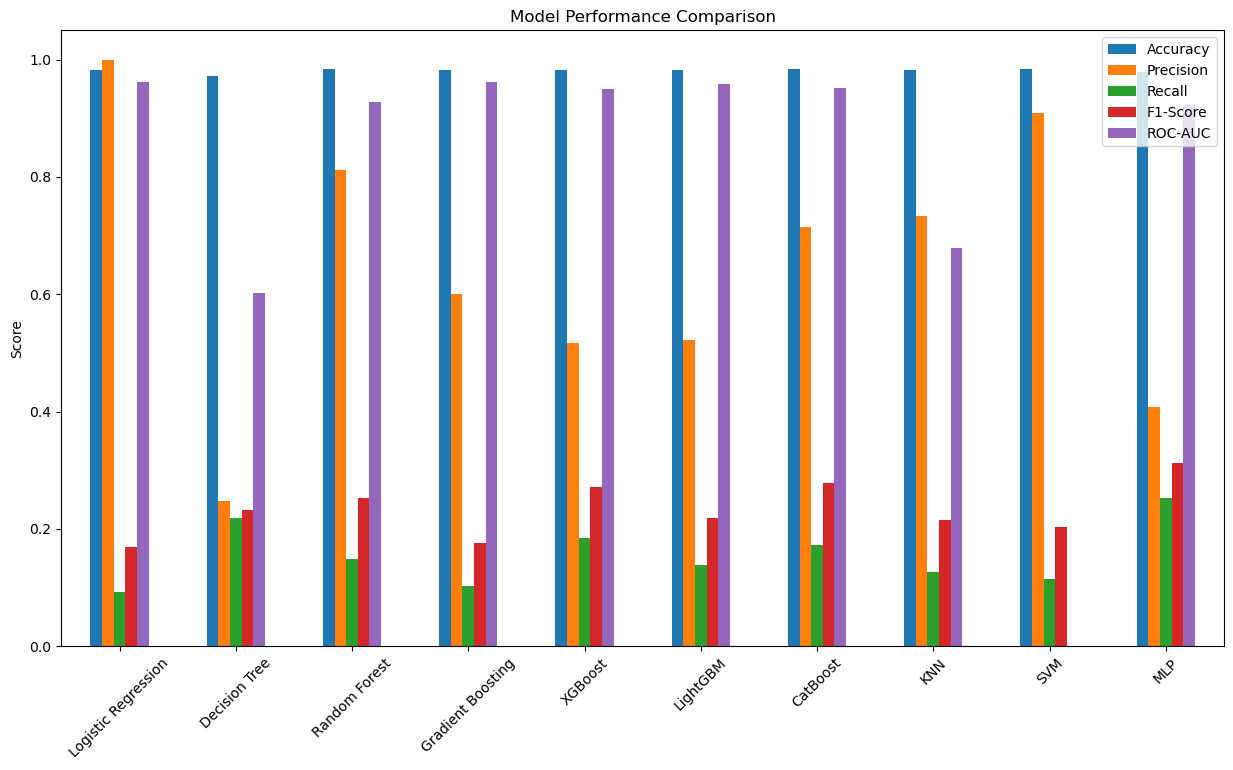

In [122]:
# Plot the metrics
results_df.plot(kind="bar", figsize=(15, 8))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


In [124]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [126]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):  # For models like SVM
            y_proba = model.decision_function(X_test)
        else:
            print(f"{name} does not support AUC/ROC calculation.")
            continue
        
        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    
    # Plot the baseline
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    
    # Customize the plot
    plt.title("ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


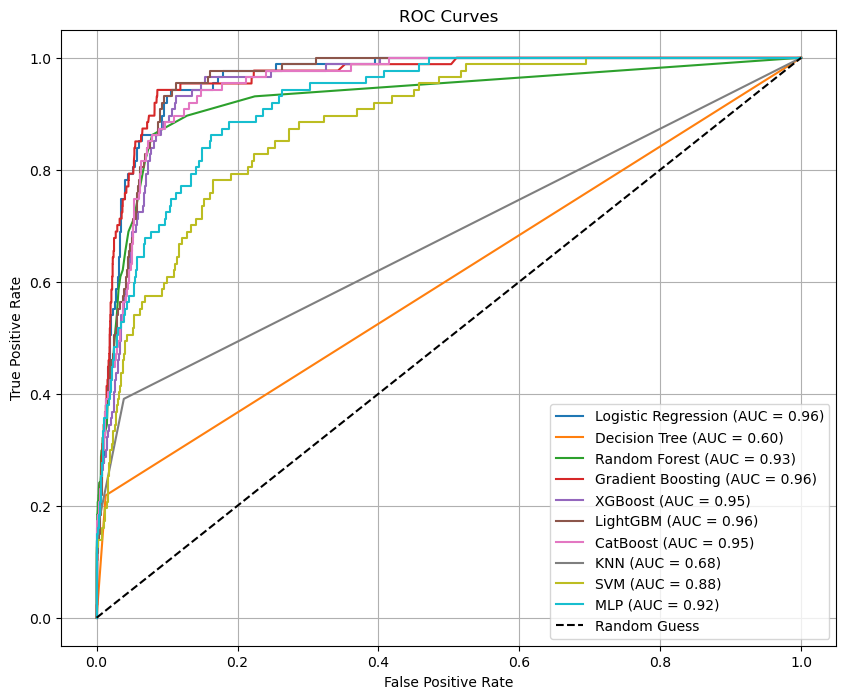

In [128]:
plot_roc_curves(models, X_test, y_test)


In [132]:
from sklearn.ensemble import VotingClassifier

# Create a list of (name, model) pairs
voting_models = [
    ('Logistic Regression', lr),
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('Gradient Boosting', gb),
    ('XGBoost', xgb),
    ('LightGBM', lgbm),
    ('CatBoost', cb),
    ('KNN', knn),
    ('SVM', SVC(probability=True, random_state=42))  # Enable probabilities
]

# Initialize a VotingClassifier with soft voting
voting_clf = VotingClassifier(estimators=voting_models, voting='soft', n_jobs=-1)

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Performance:")
print(classification_report(y_test, y_pred_voting))


Voting Classifier Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.92      0.14      0.24        87

    accuracy                           0.98      4622
   macro avg       0.95      0.57      0.62      4622
weighted avg       0.98      0.98      0.98      4622



In [134]:
from sklearn.ensemble import StackingClassifier

# Create a stacking ensemble with a meta-model
stacking_clf = StackingClassifier(
    estimators=voting_models,
    final_estimator=LogisticRegression(),
    n_jobs=-1
)

# Train the StackingClassifier
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking model
y_pred_stacking = stacking_clf.predict(X_test)
print("Stacking Classifier Performance:")
print(classification_report(y_test, y_pred_stacking))


[LightGBM] [Info] Number of positive: 248, number of negative: 14539
[LightGBM] [Info] Number of positive: 248, number of negative: 14539
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of positive: 248, number of negative: 14540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 14787, number of used features: 19
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 14787, number of used features: 19
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Numb

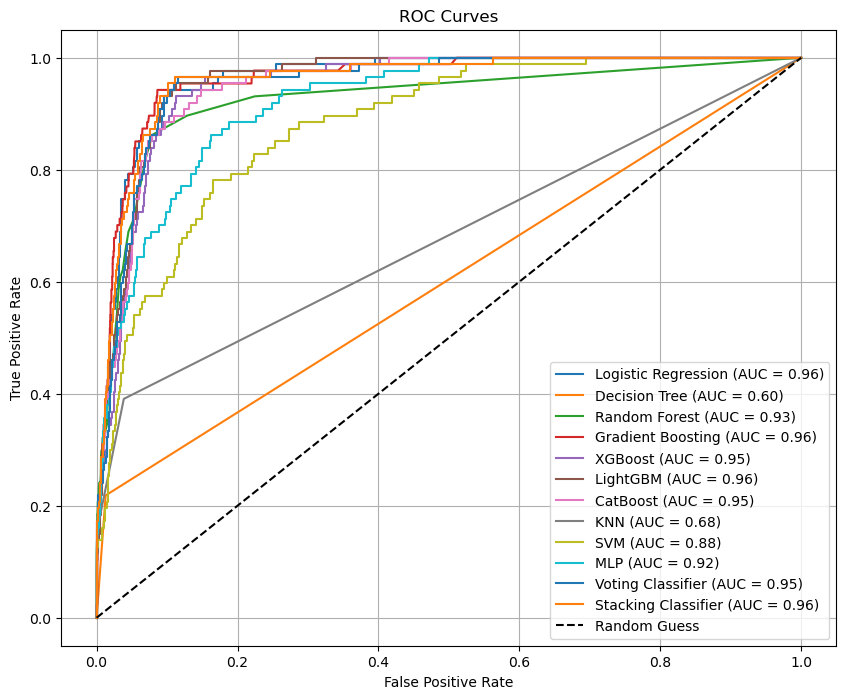

In [136]:
# Add the ensemble models to the models dictionary
models['Voting Classifier'] = voting_clf
models['Stacking Classifier'] = stacking_clf

# Plot ROC curves for all models including the ensemble
plot_roc_curves(models, X_test, y_test)


In [138]:
import joblib

# Save the trained model
joblib.dump(voting_clf, "voting_classifier_model.pkl")
print("Model saved as voting_classifier_model.pkl")


Model saved as voting_classifier_model.pkl


In [144]:
features = bank_additional_full_clean.drop(columns=['y']) 


In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


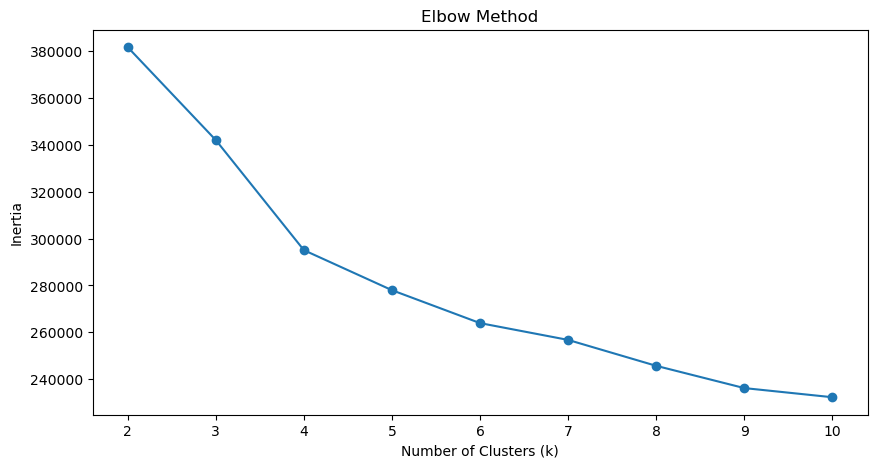

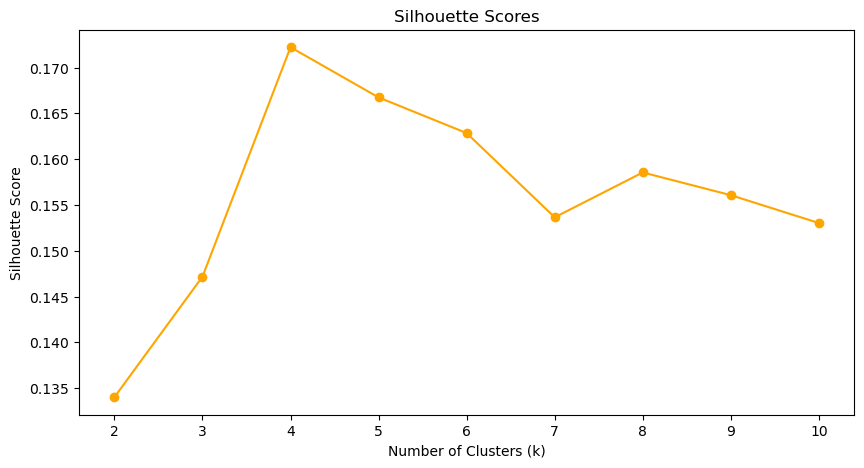

In [152]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Fit the optimal KMeans model (assume optimal k = 3 as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)

# Assign clusters to each data point
bank_additional_full_clean['Cluster'] = kmeans.labels_



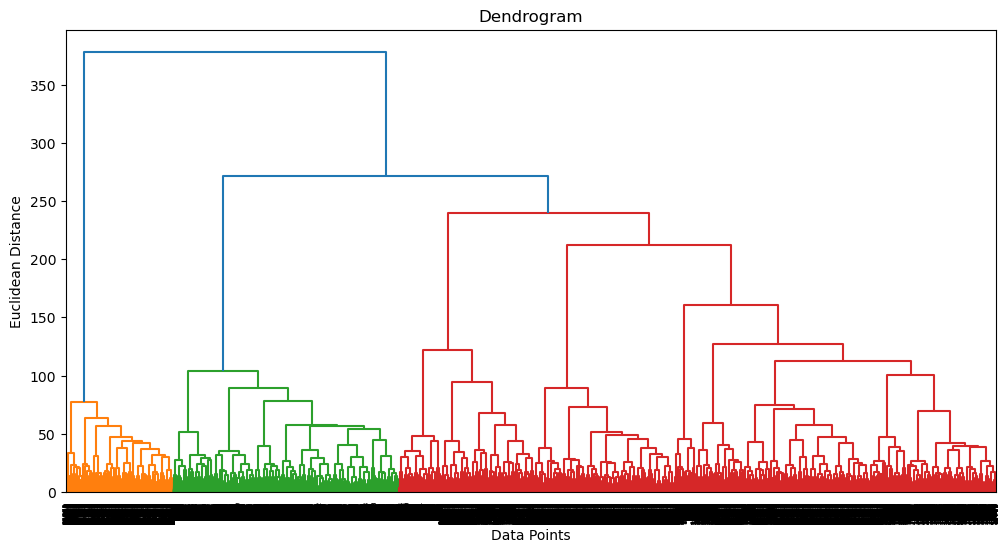

In [161]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Compute the linkage matrix
linkage_matrix = linkage(features_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Fit the Hierarchical Clustering model (assume 3 clusters)
hierarchical = AgglomerativeClustering(n_clusters=3)
bank_additional_full_clean['Cluster_Hierarchical'] = hierarchical.fit_predict(features_scaled)


In [162]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
bank_additional_full_clean['Cluster_DBSCAN'] = dbscan.fit_predict(features_scaled)

# Check the number of clusters (excluding noise, labeled as -1)
print("DBSCAN clusters:", len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0))


DBSCAN clusters: 47


In [163]:
print("Silhouette Score (KMeans):", silhouette_score(features_scaled, kmeans.labels_))
print("Silhouette Score (Hierarchical):", silhouette_score(features_scaled, hierarchical.labels_))


Silhouette Score (KMeans): 0.14715766144616635
Silhouette Score (Hierarchical): 0.13857607346955214


In [164]:
from sklearn.metrics import calinski_harabasz_score

print("Calinski-Harabasz Index (KMeans):", calinski_harabasz_score(features_scaled, kmeans.labels_))
print("Calinski-Harabasz Index (Hierarchical):", calinski_harabasz_score(features_scaled, hierarchical.labels_))


Calinski-Harabasz Index (KMeans): 3278.820064296442
Calinski-Harabasz Index (Hierarchical): 3798.733992008097


In [165]:
from sklearn.metrics import davies_bouldin_score

print("Davies-Bouldin Index (KMeans):", davies_bouldin_score(features_scaled, kmeans.labels_))
print("Davies-Bouldin Index (Hierarchical):", davies_bouldin_score(features_scaled, hierarchical.labels_))


Davies-Bouldin Index (KMeans): 2.2143588895678548
Davies-Bouldin Index (Hierarchical): 1.9878150345650638


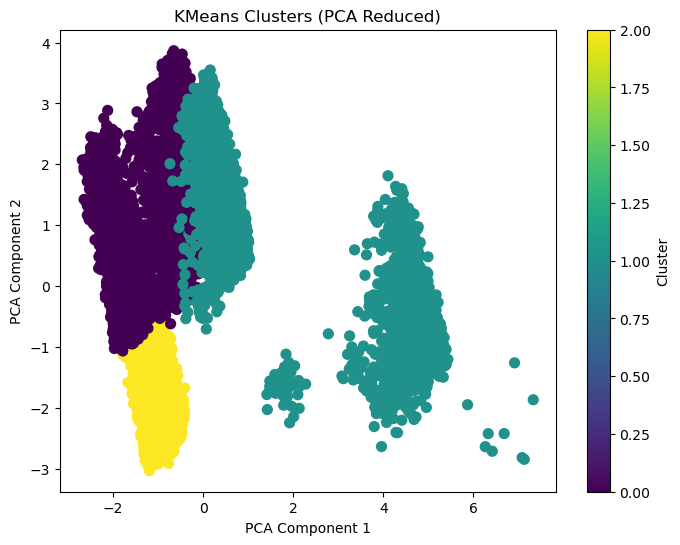

In [166]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title("KMeans Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()
